In [1]:
import os
import sys
!export PYTHONPATH="${PYTHONPATH}:~/gt/3D_tracking/DEV/Tracking/nuscenes"
import numpy as np

from sklearn.utils.linear_assignment_ import linear_assignment

from nuscenes import NuScenes
from nuscenes.eval.common.config import config_factory
from nuscenes.eval.tracking.evaluate import TrackingEval
from nuscenes.eval.detection.data_classes import DetectionConfig
from nuscenes.eval.detection.data_classes import DetectionBox
from nuscenes.eval.tracking.data_classes import TrackingBox
from nuscenes.eval.common.loaders import load_prediction, load_gt, filter_eval_boxes
from nuscenes.eval.tracking.loaders import create_tracks
from pyquaternion import Quaternion
#from main import iou3d, convert_3dbox_to_8corner
import argparse
import pickle 
from utils.dict import *
from utils.stats import add_center_dist
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

In [2]:
training_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving"
training_data = pickle.load(open(training_file_name , 'rb'))

Index  0
0.13497975860270023
0.3125658129024935


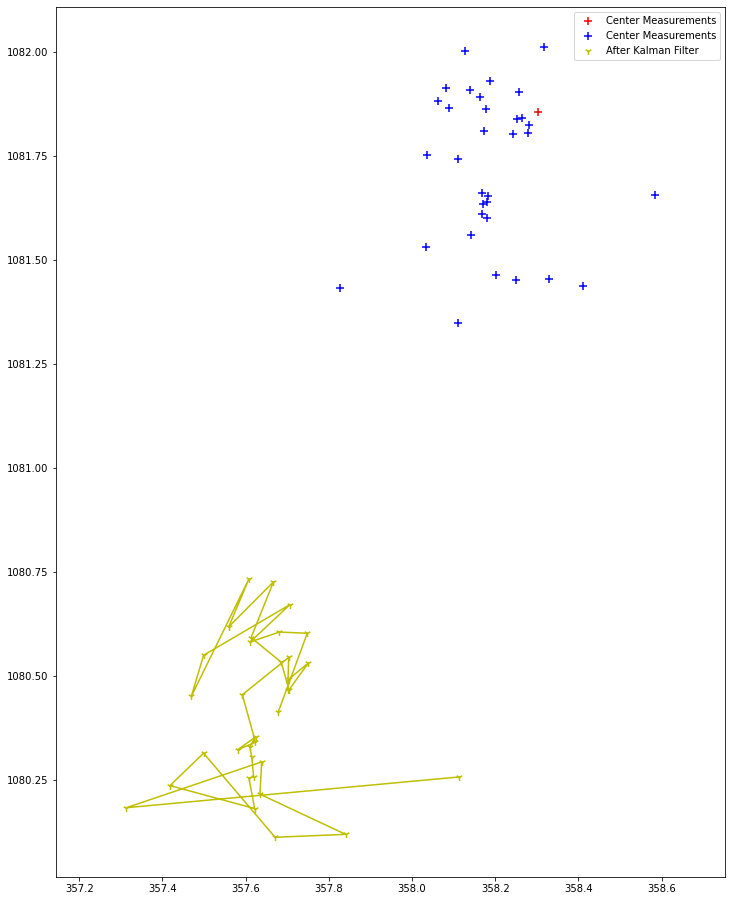

Index  1
0.13497975860270023
0.3125658129024935


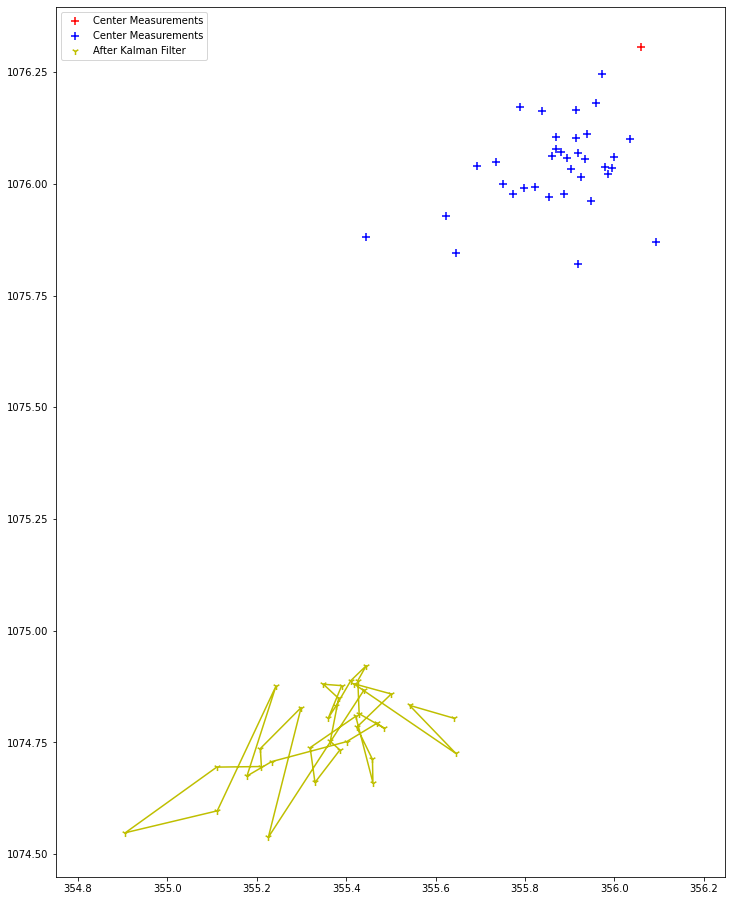

Index  2
0.13497975860270023
0.3125658129024935


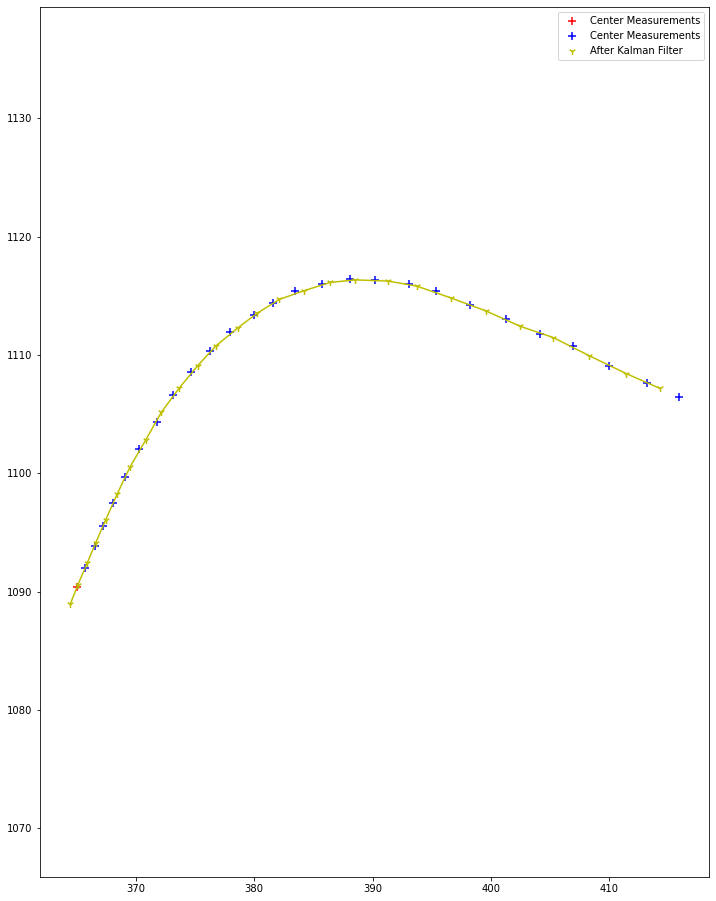

Index  3
0.13497975860270023
0.3125658129024935


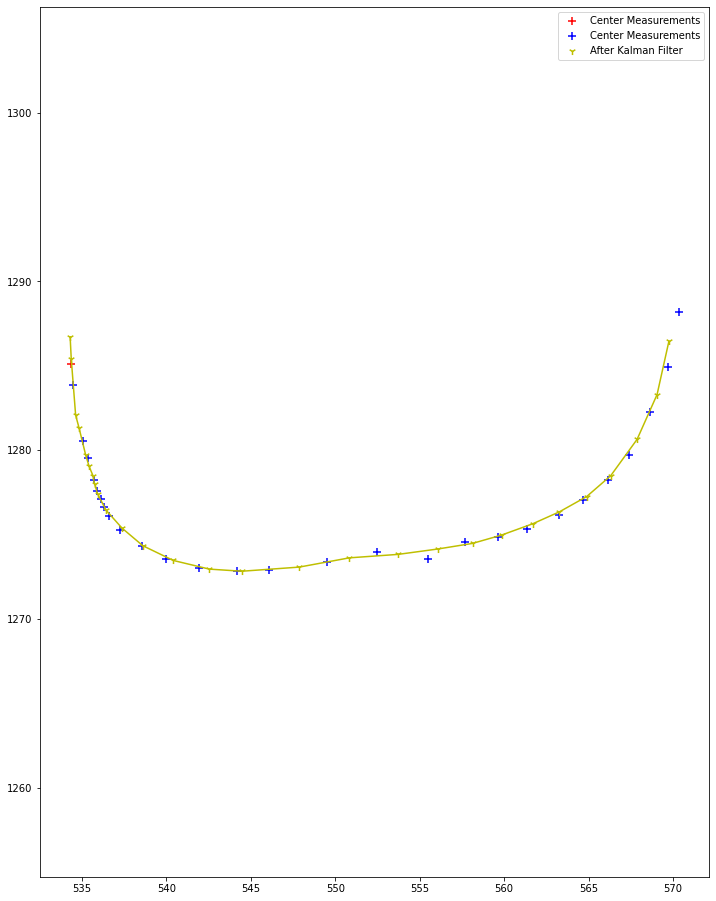

Index  4
0.13497975860270023
0.3125658129024935


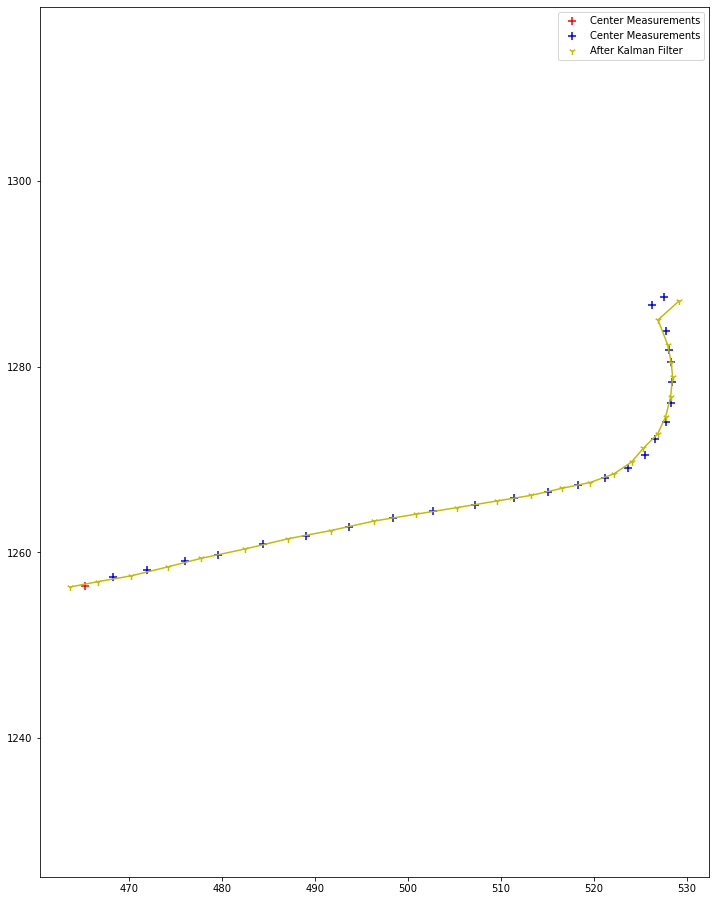

Index  5
0.13497975860270023
0.3125658129024935


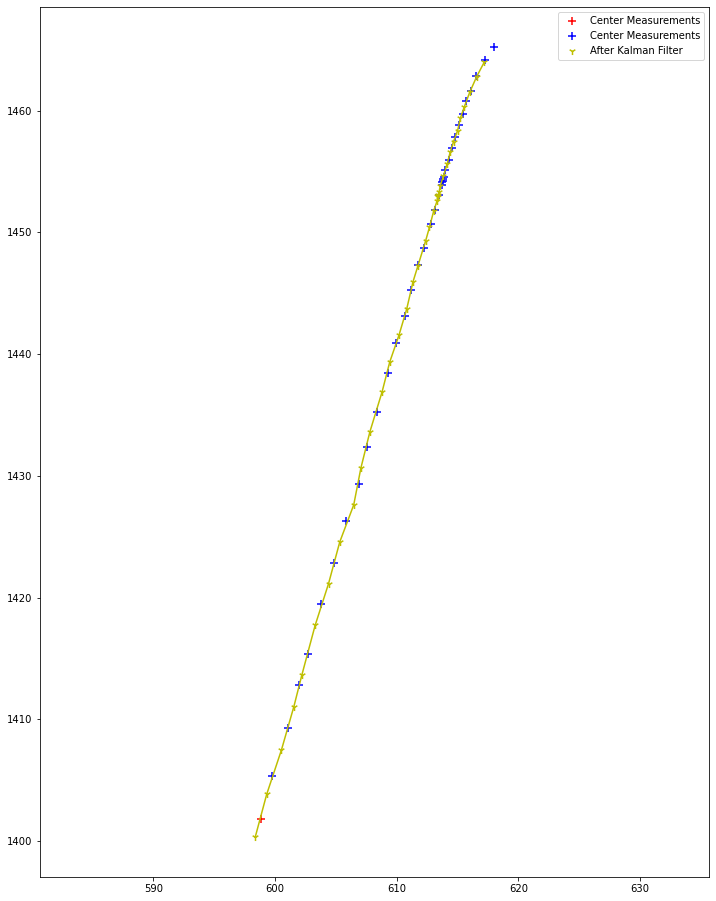

Index  6
0.13497975860270023
0.3125658129024935


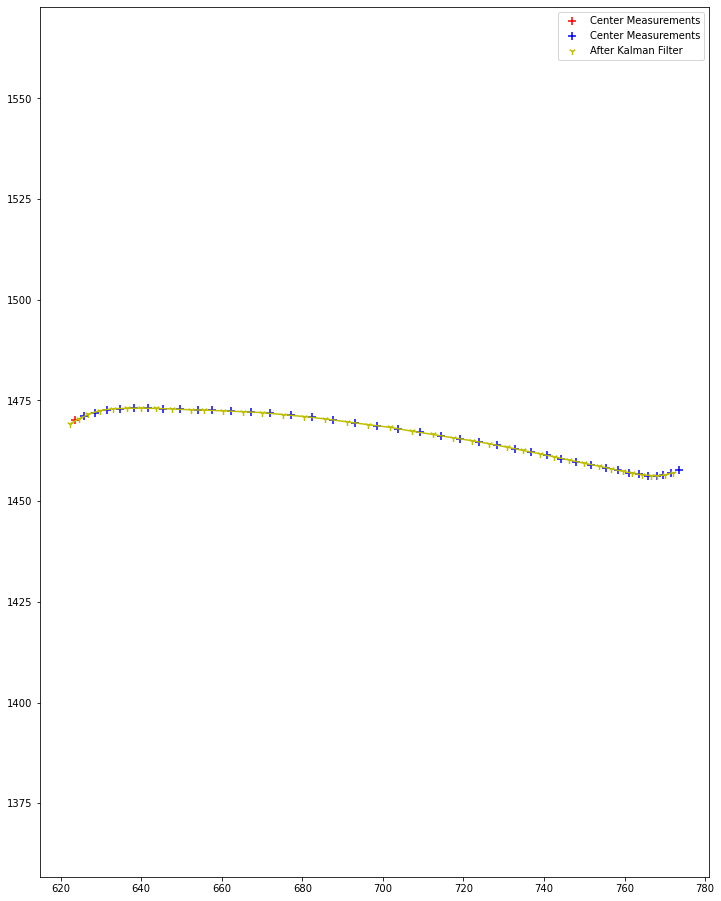

Index  7
0.13497975860270023
0.3125658129024935


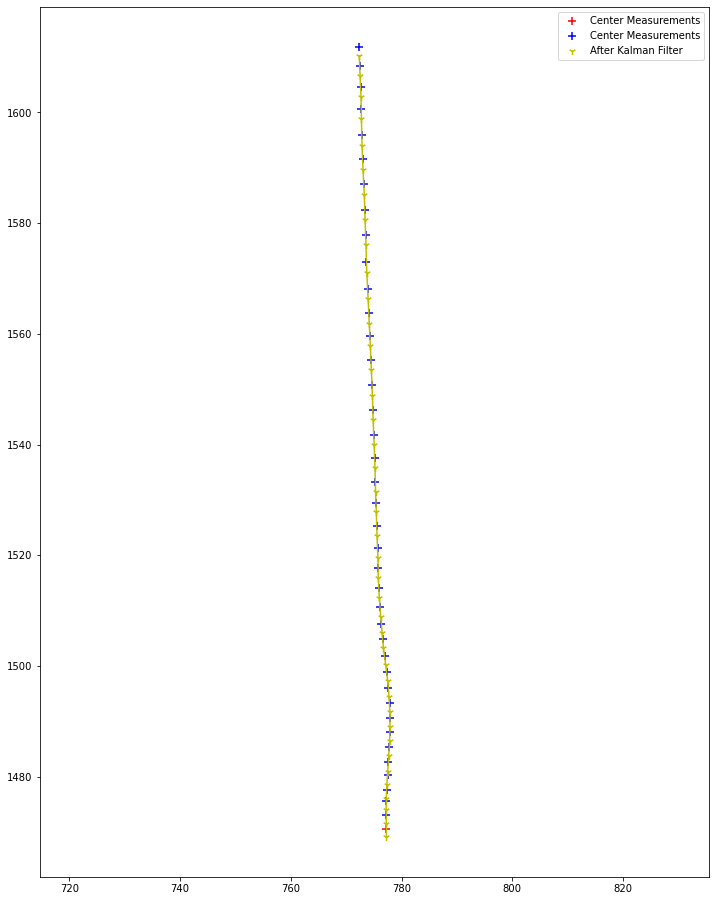

Index  8
0.13497975860270023
0.3125658129024935


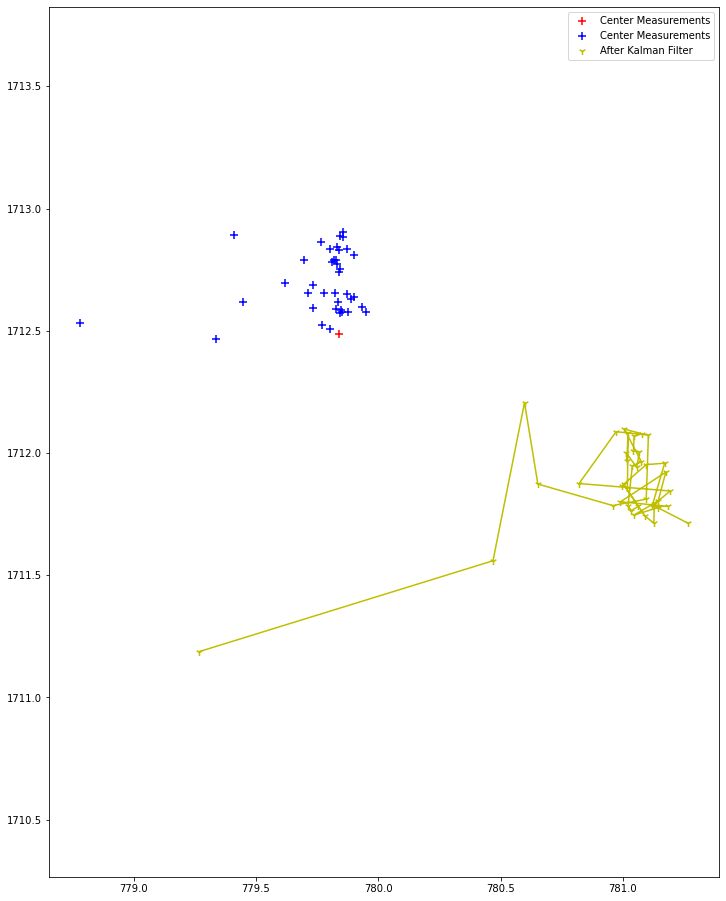

Index  9
0.13497975860270023
0.3125658129024935


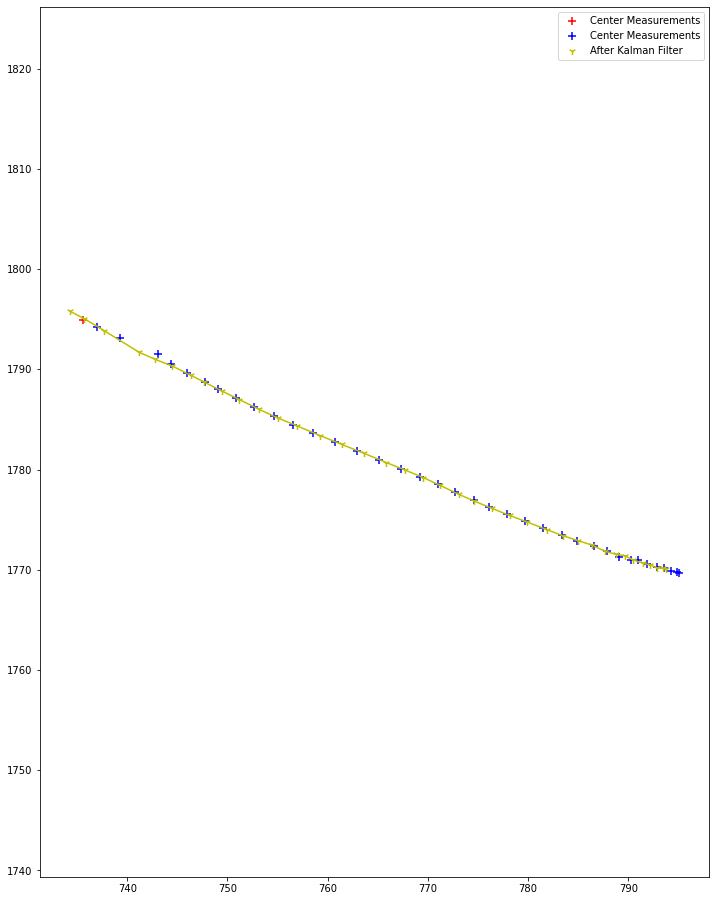

Index  10
0.13497975860270023
0.3125658129024935


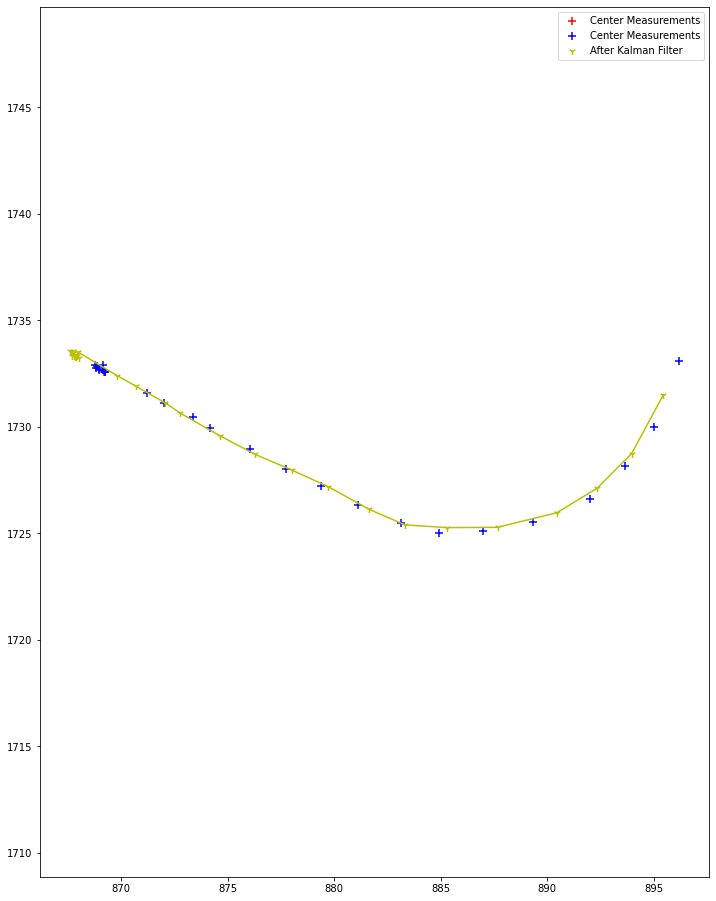

Index  11
0.13497975860270023
0.3125658129024935


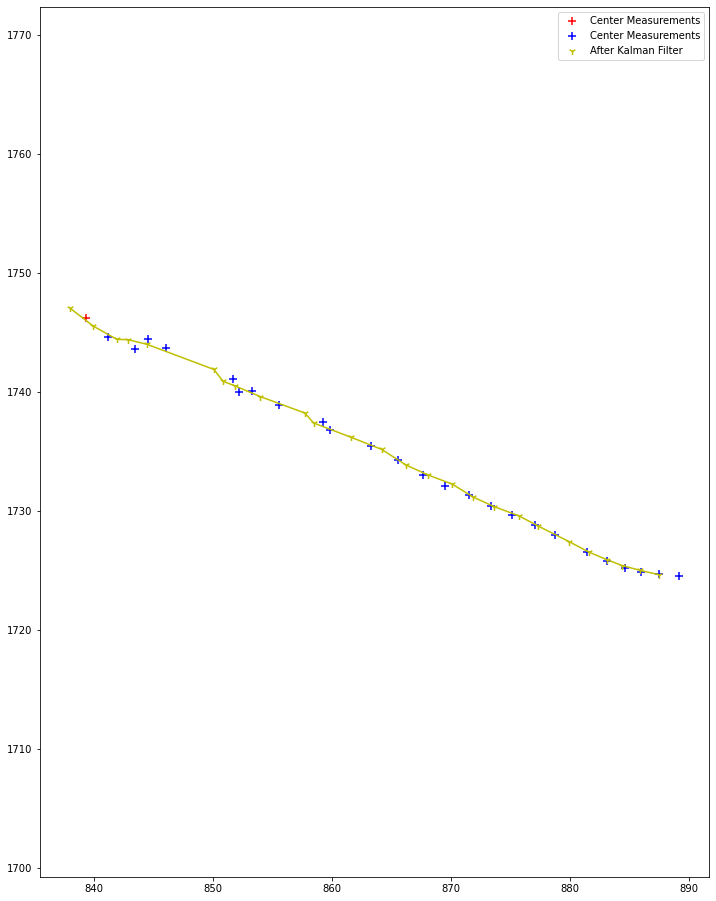

Index  12
0.13497975860270023
0.3125658129024935


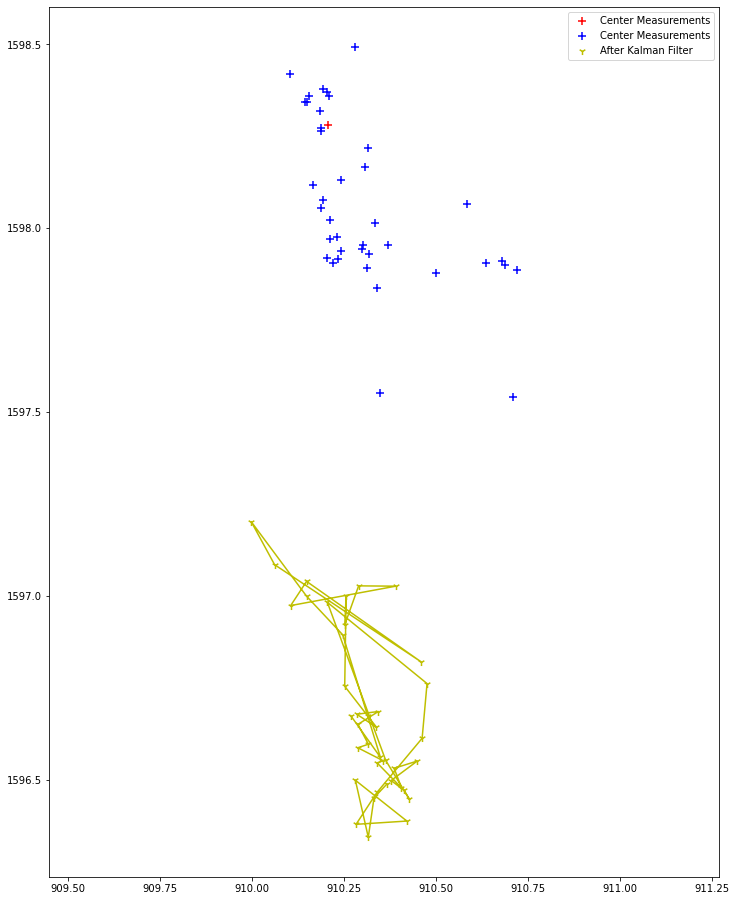

Index  13
0.13497975860270023
0.3125658129024935


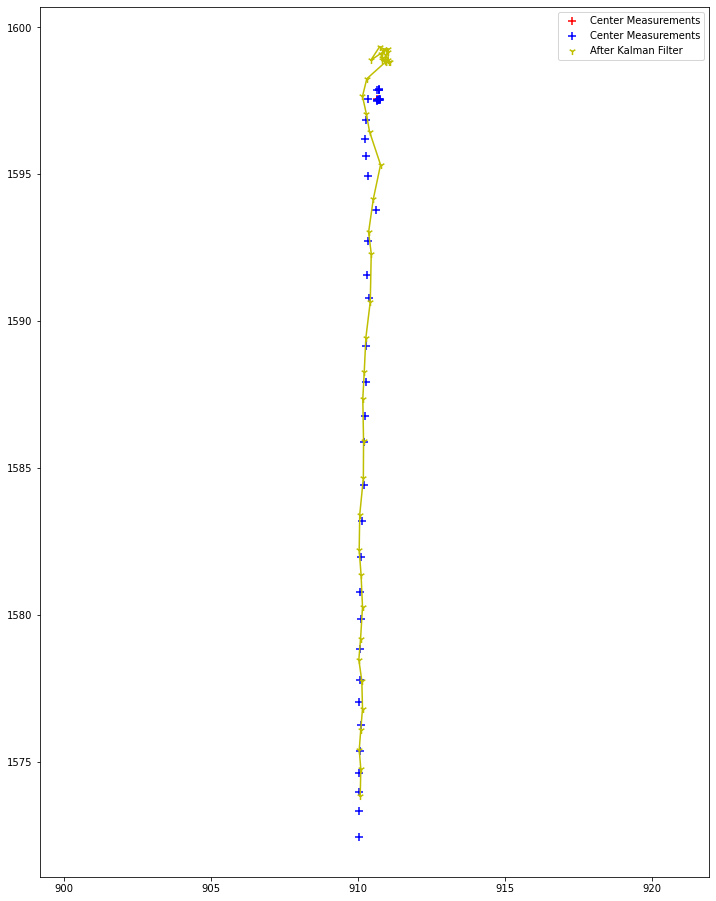

Index  14
0.13497975860270023
0.3125658129024935


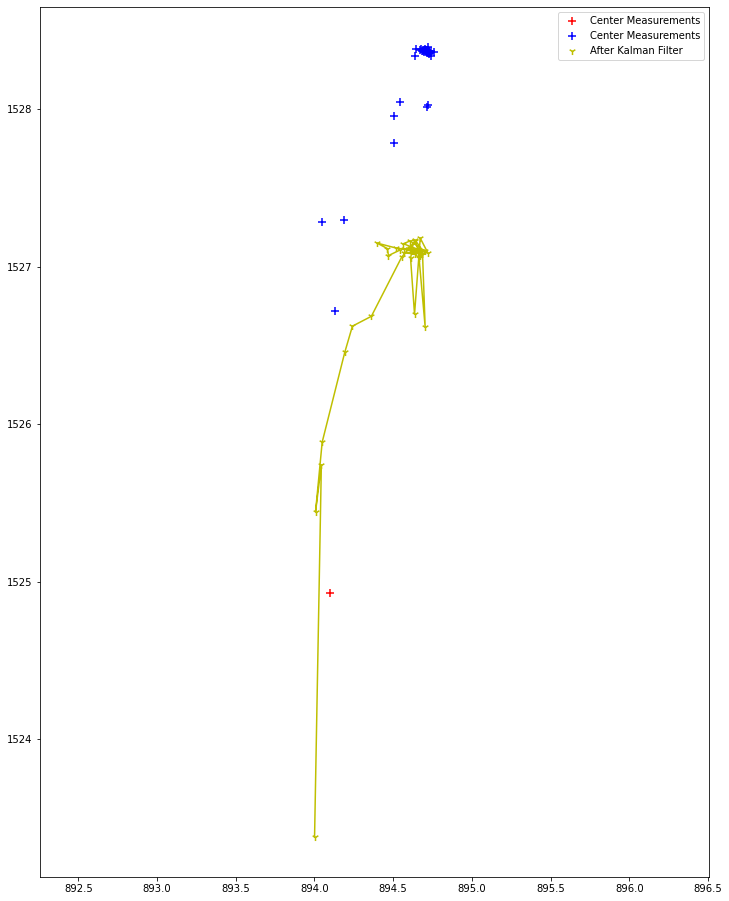

Index  15
0.13497975860270023
0.3125658129024935


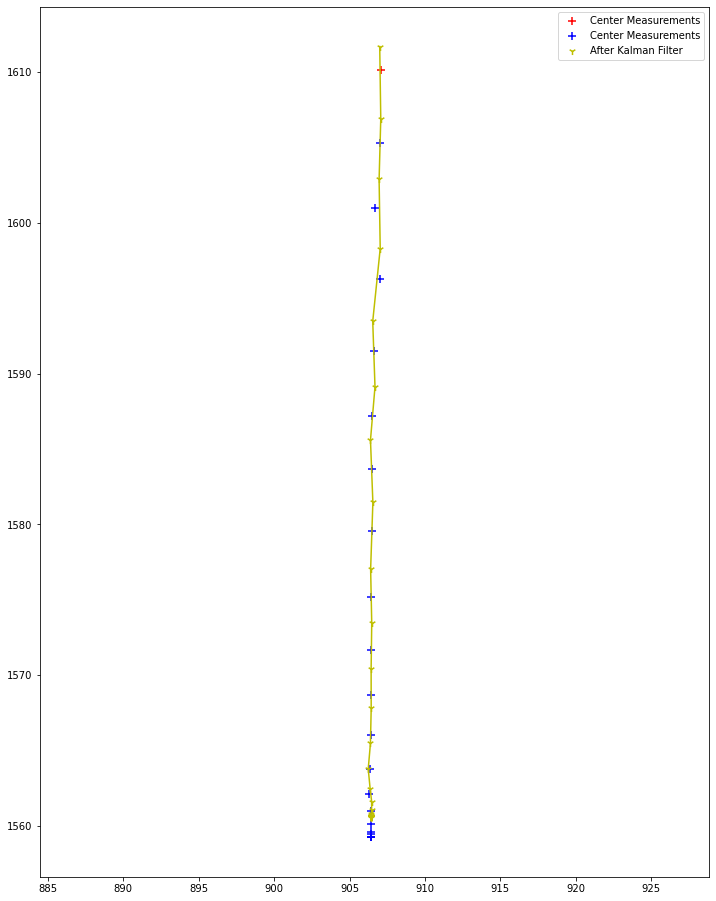

Index  16
0.13497975860270023
0.3125658129024935


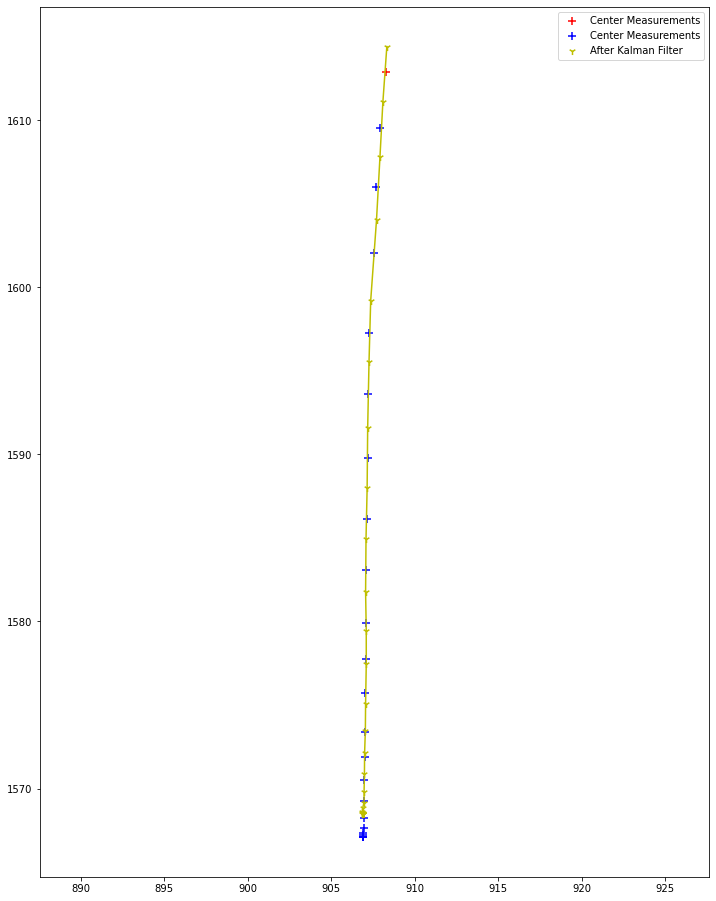

Index  17
0.13497975860270023
0.3125658129024935


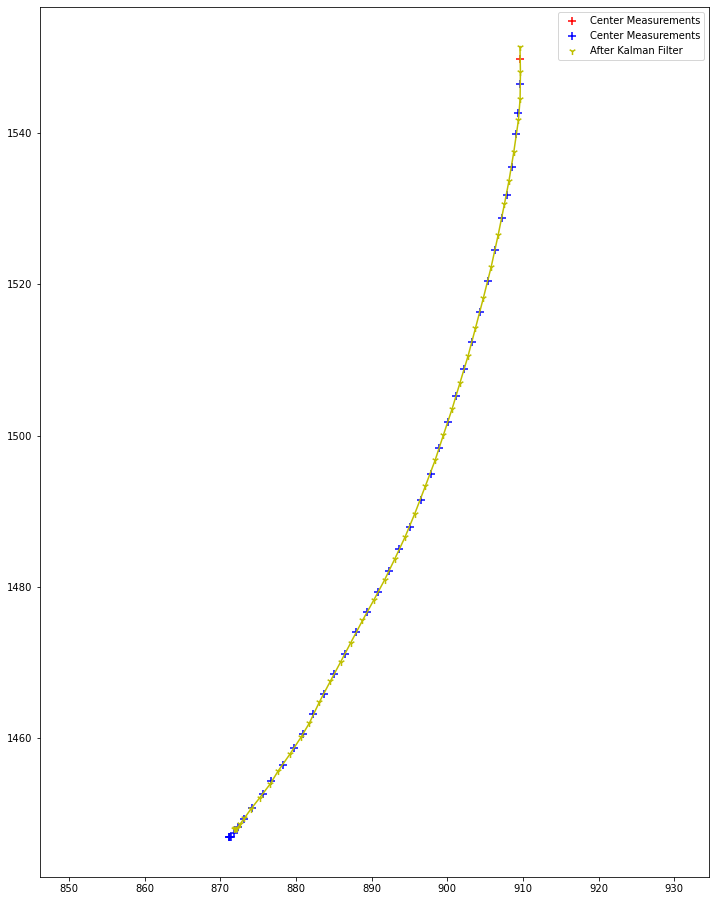

Index  18
0.13497975860270023
0.3125658129024935


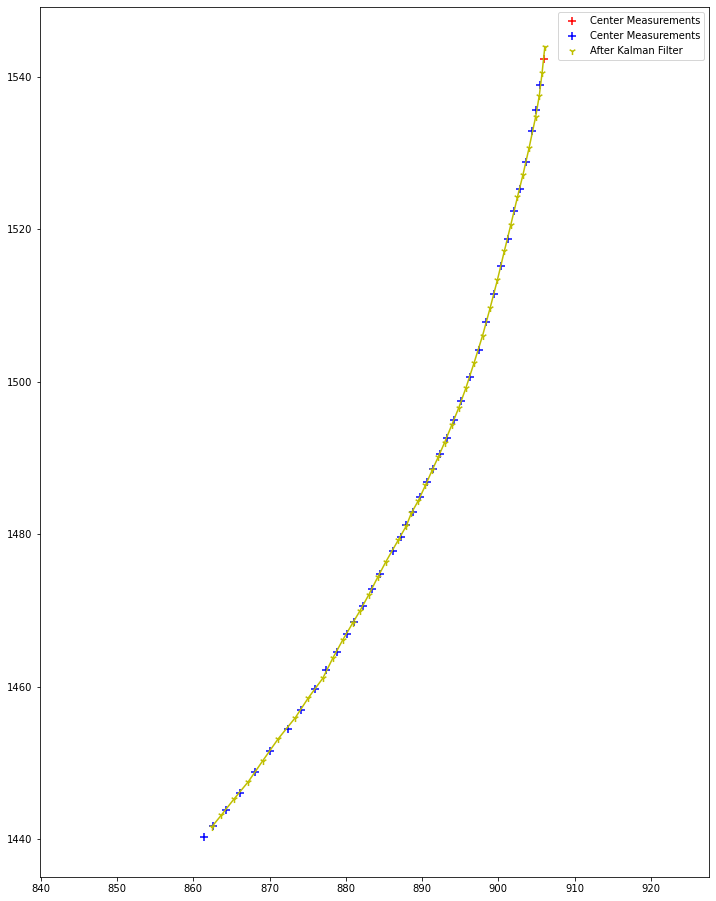

Index  19
0.13497975860270023
0.3125658129024935


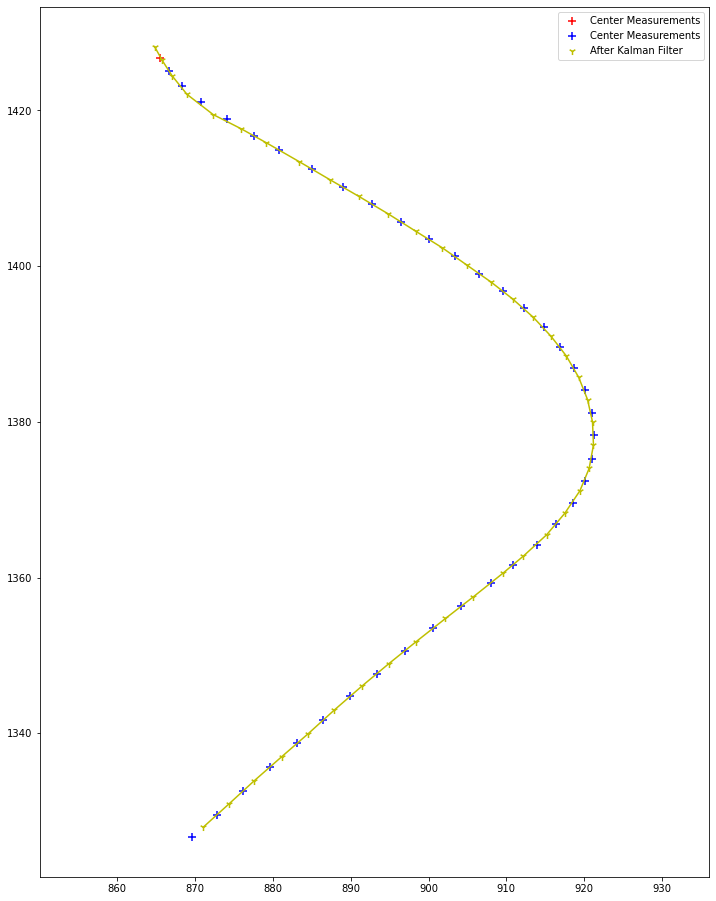

Index  20
0.13497975860270023
0.3125658129024935


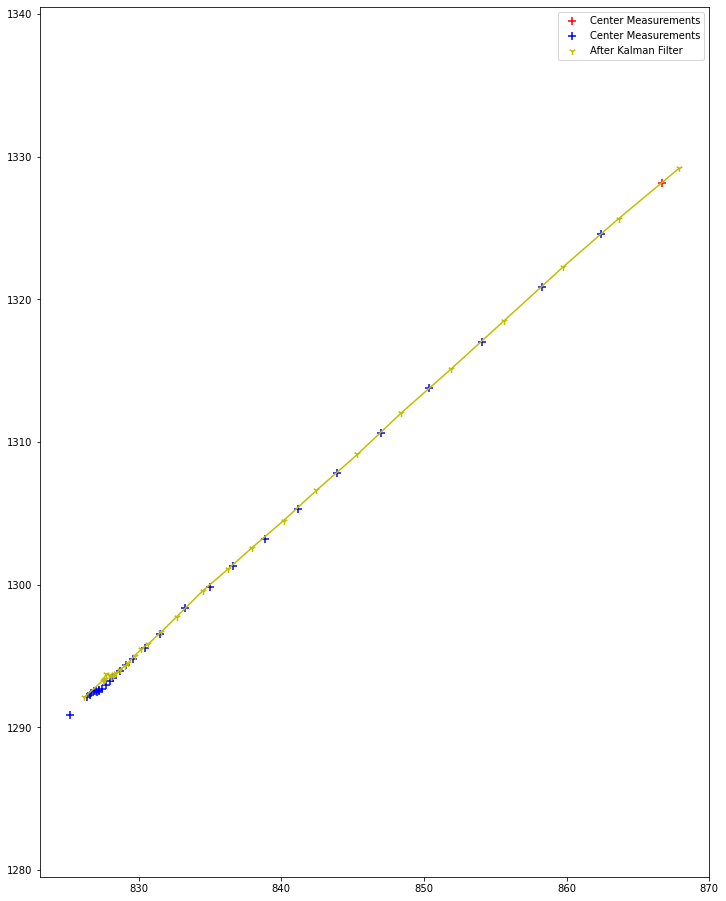

Index  21
0.13497975860270023
0.3125658129024935


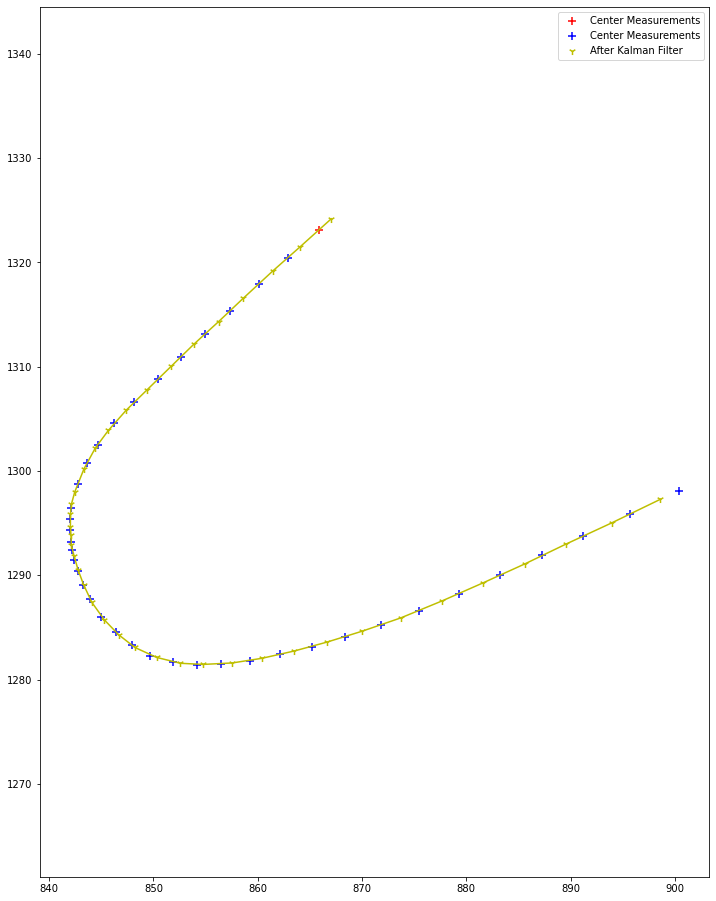

Index  22
0.13497975860270023
0.3125658129024935


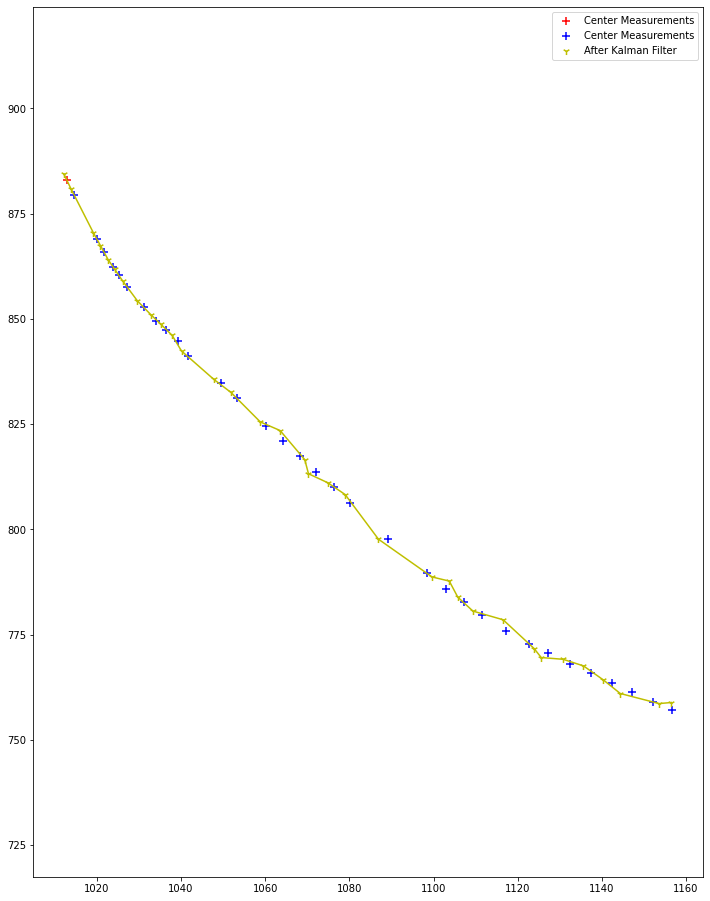

Index  23
0.13497975860270023
0.3125658129024935


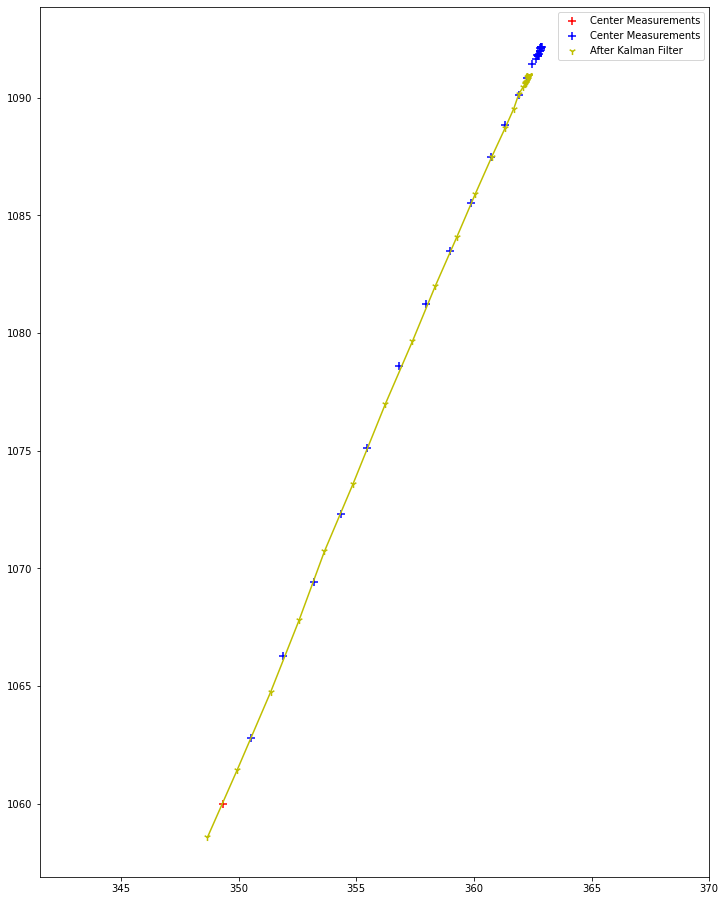

Index  24
0.13497975860270023
0.3125658129024935


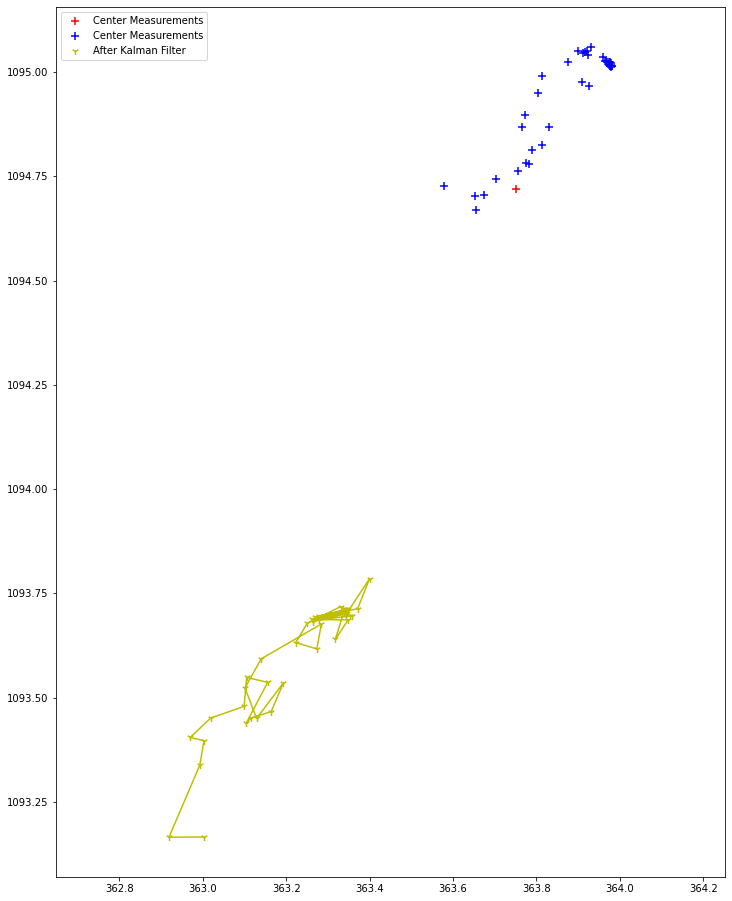

Index  25
0.13497975860270023
0.3125658129024935


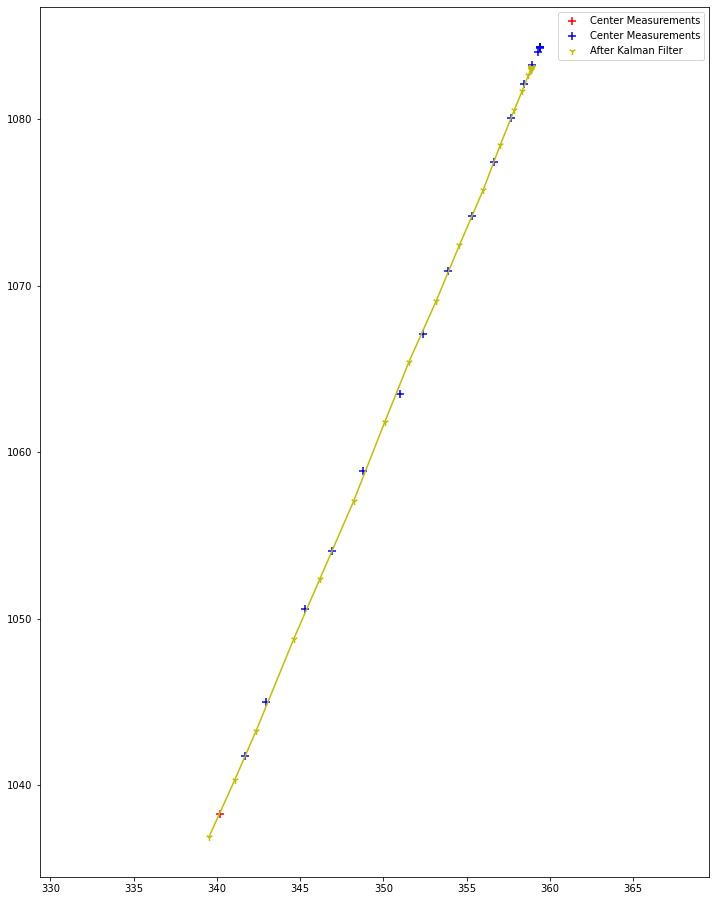

Index  26
0.13497975860270023
0.3125658129024935


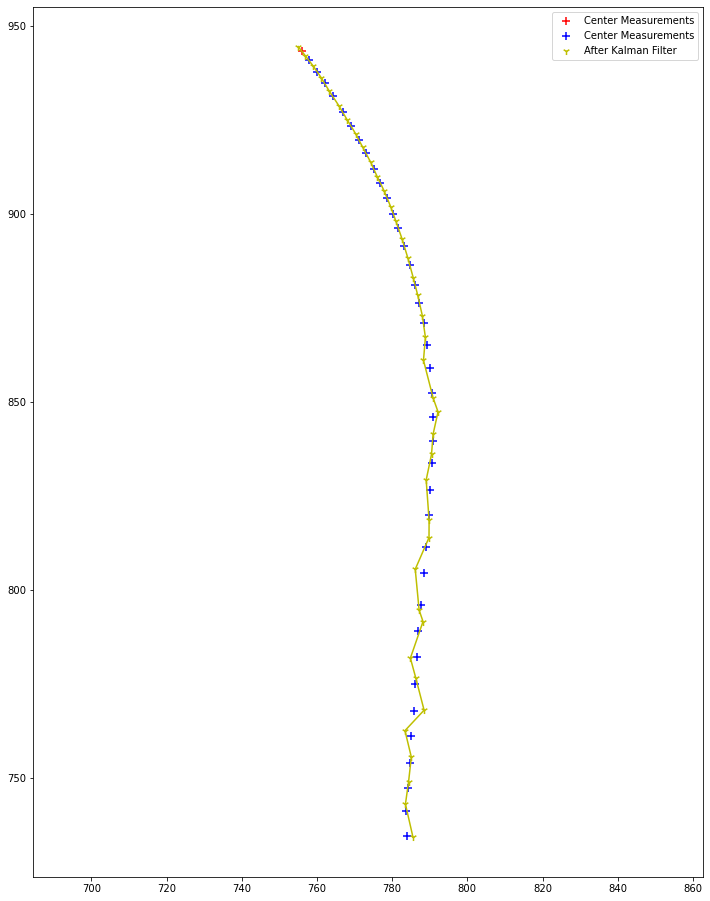

Index  27
0.13497975860270023
0.3125658129024935


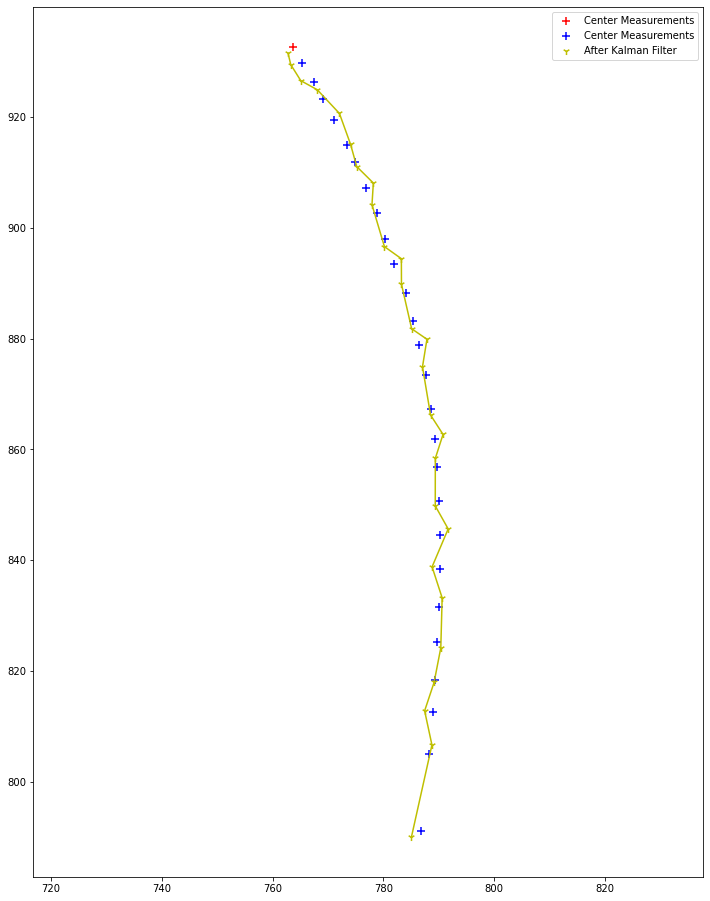

Index  28
0.13497975860270023
0.3125658129024935


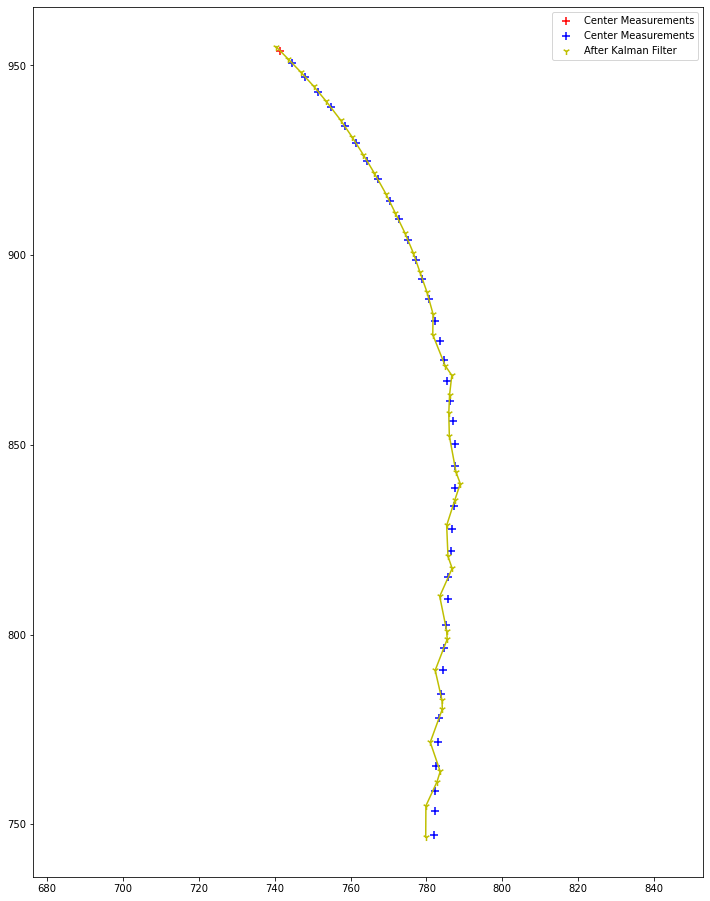

Index  29
0.13497975860270023
0.3125658129024935


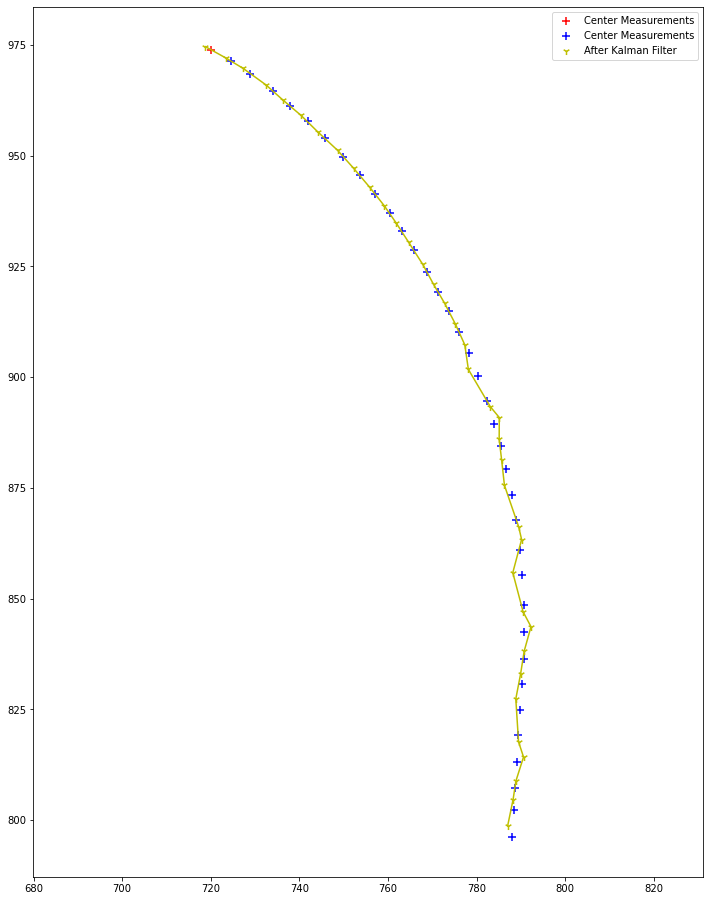

Index  30
0.13497975860270023
0.3125658129024935


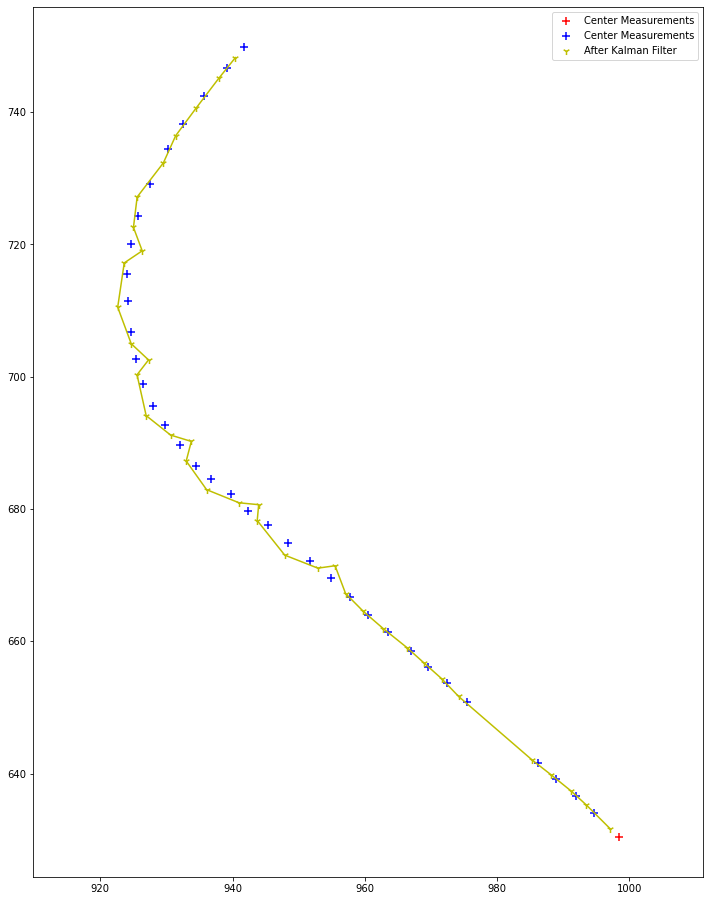

Index  31
0.13497975860270023
0.3125658129024935


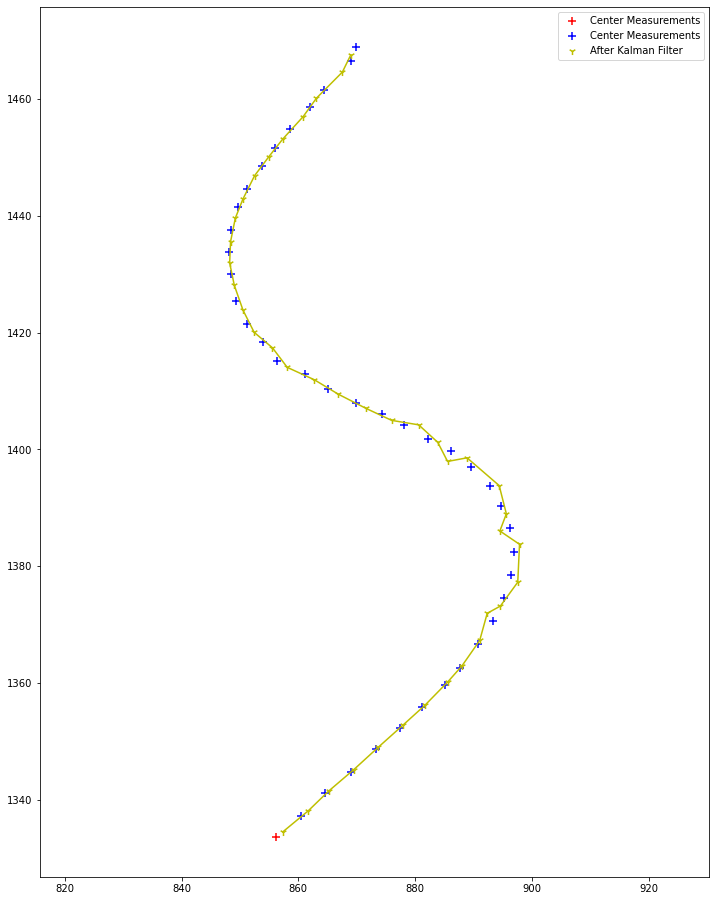

Index  32
0.13497975860270023
0.3125658129024935


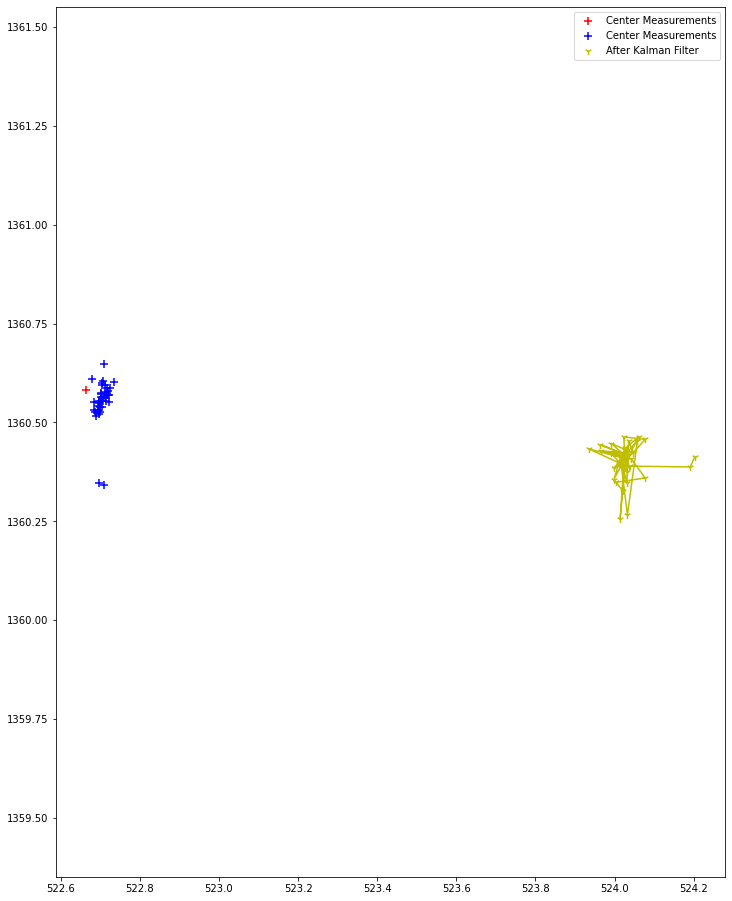

Index  33
0.13497975860270023
0.3125658129024935


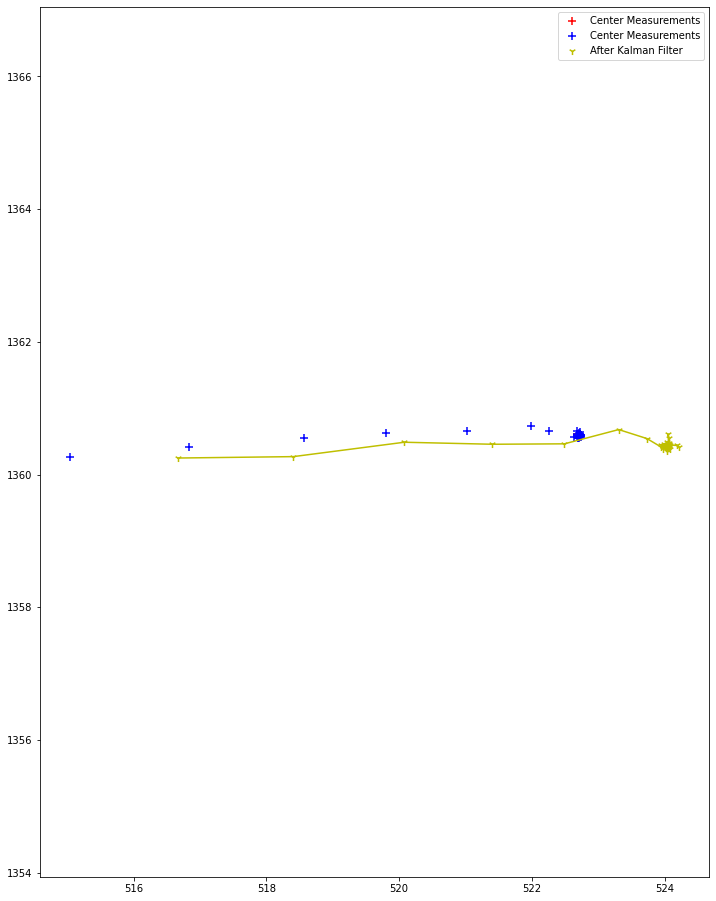

Index  34
0.13497975860270023
0.3125658129024935


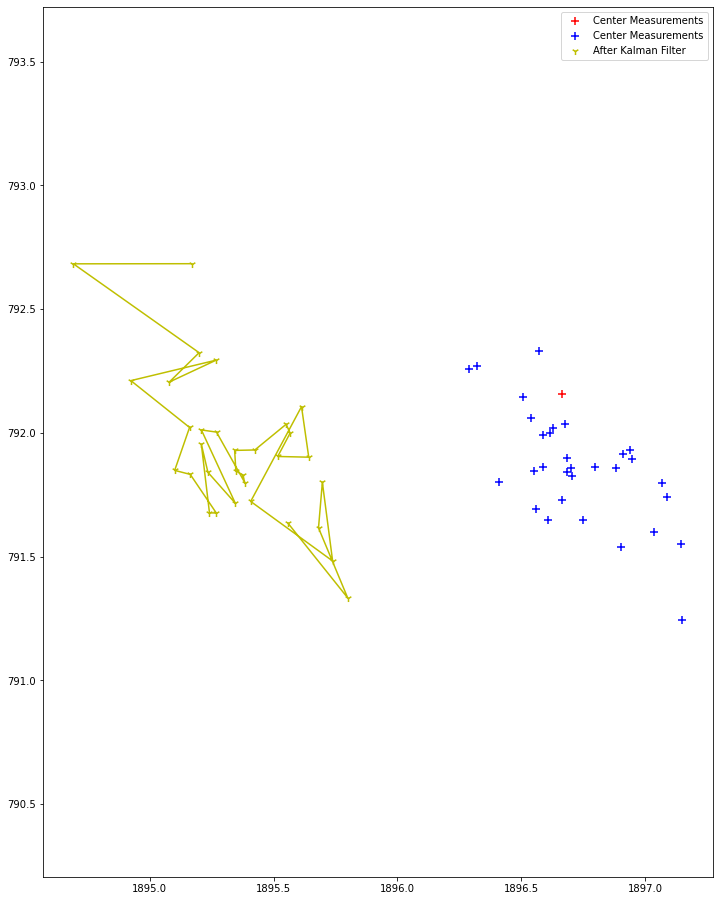

Index  35
0.13497975860270023
0.3125658129024935


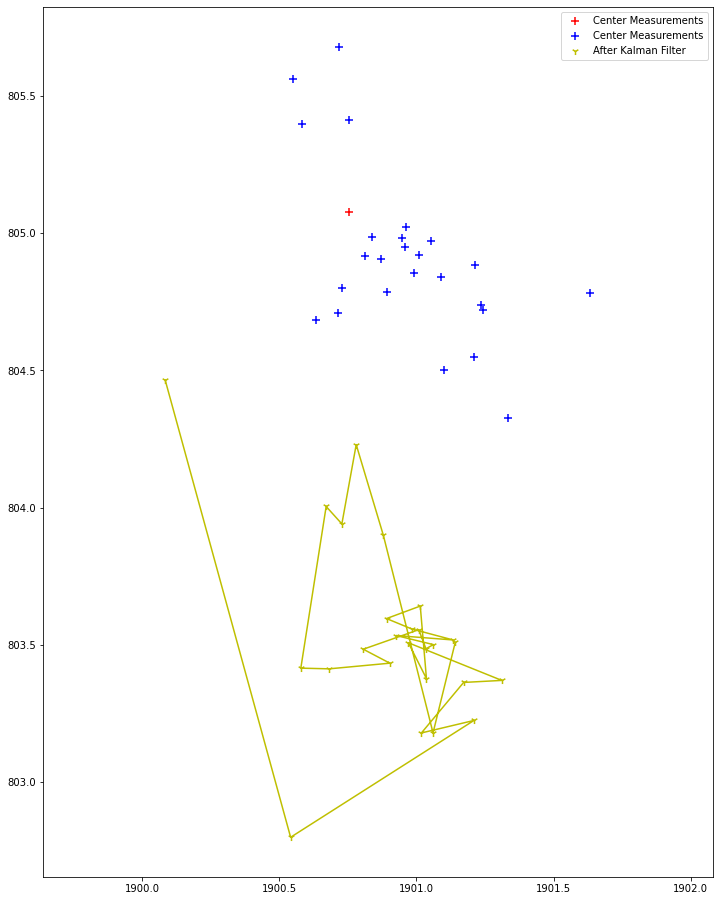

Index  36
0.13497975860270023
0.3125658129024935


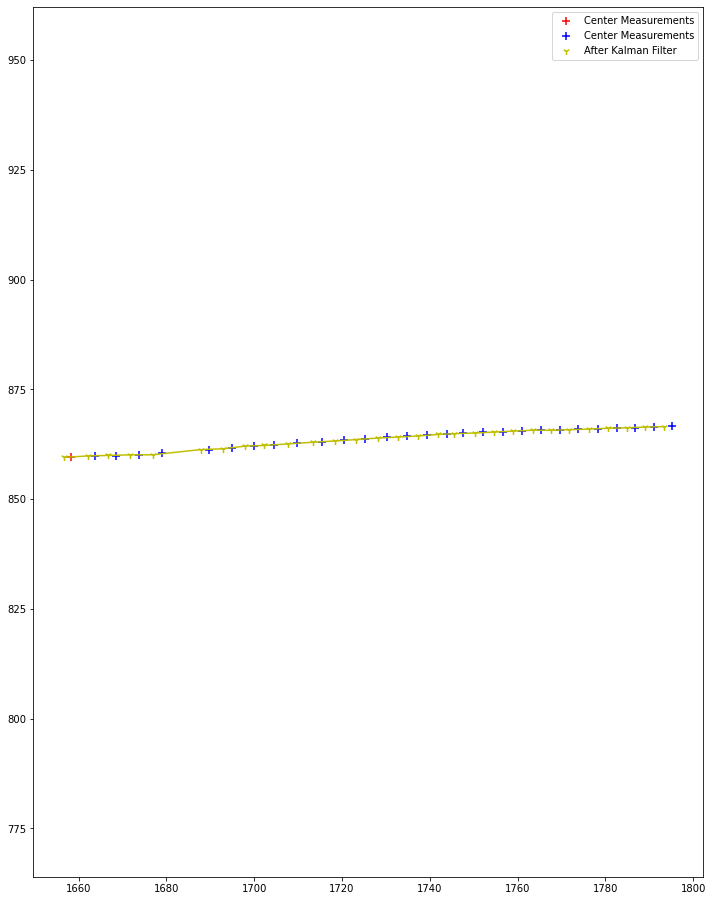

Index  37
0.13497975860270023
0.3125658129024935


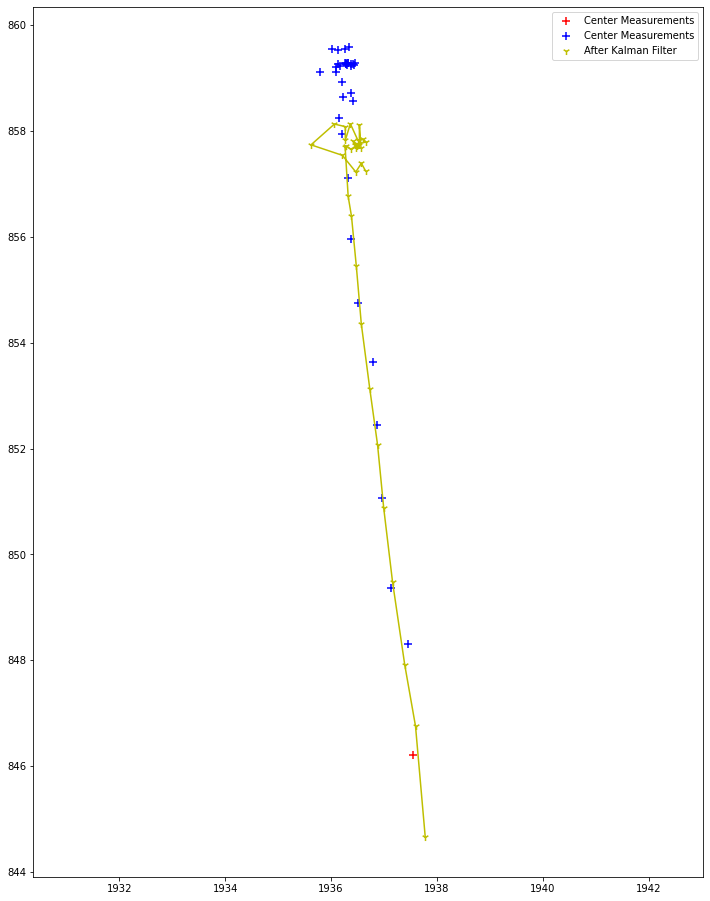

Index  38
0.13497975860270023
0.3125658129024935


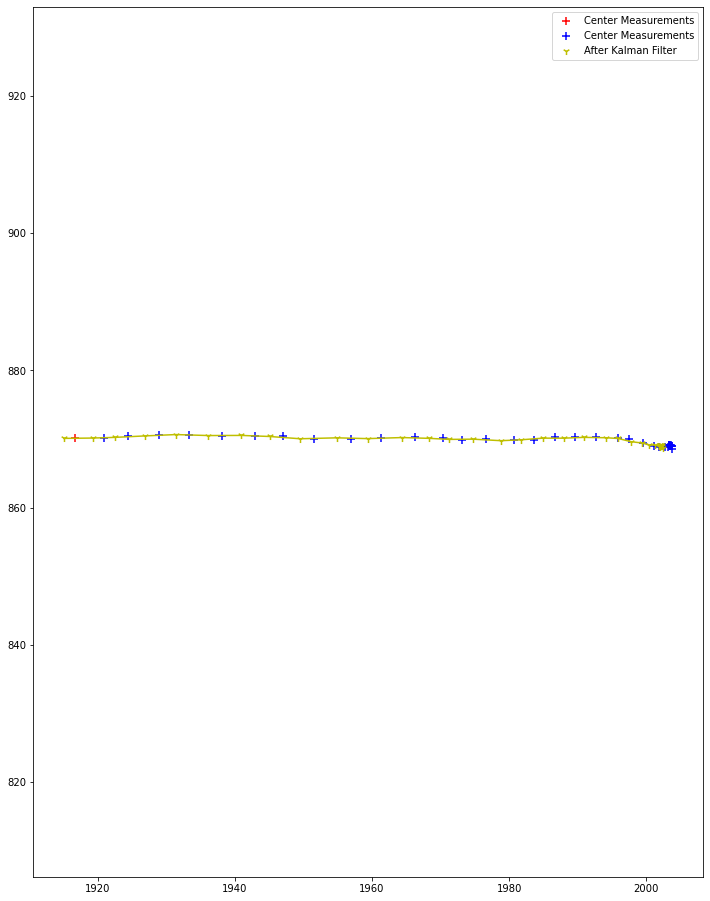

Index  39
0.13497975860270023
0.3125658129024935


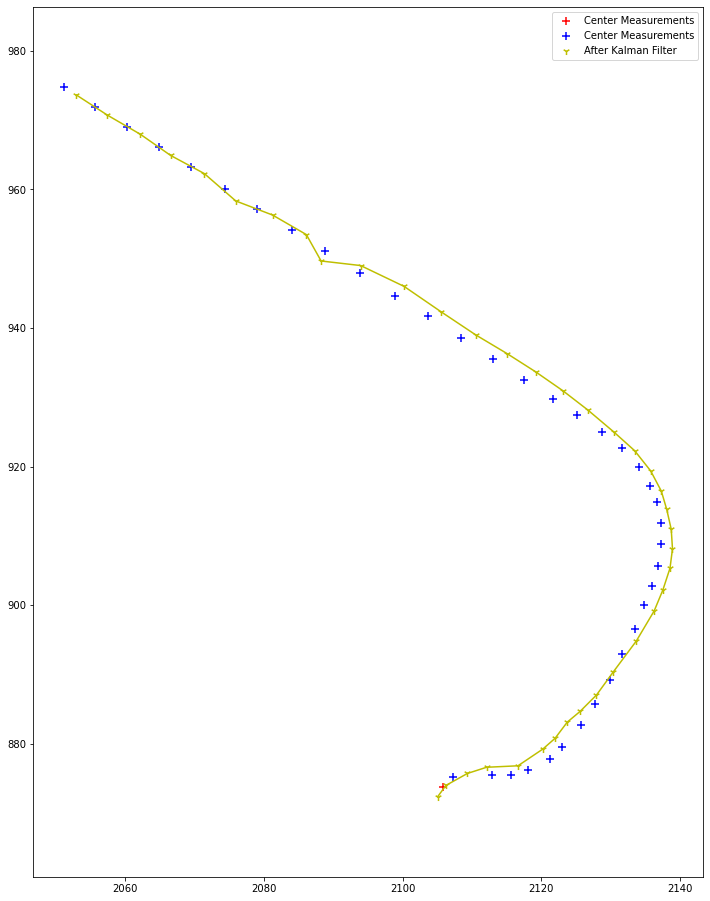

Index  40
0.13497975860270023
0.3125658129024935


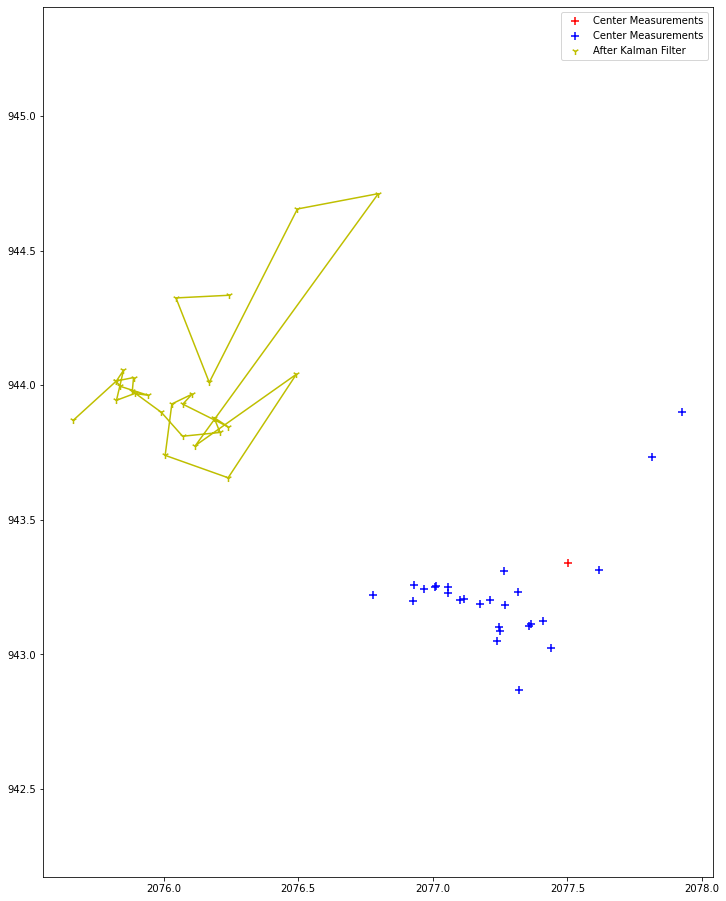

Index  41
0.13497975860270023
0.3125658129024935


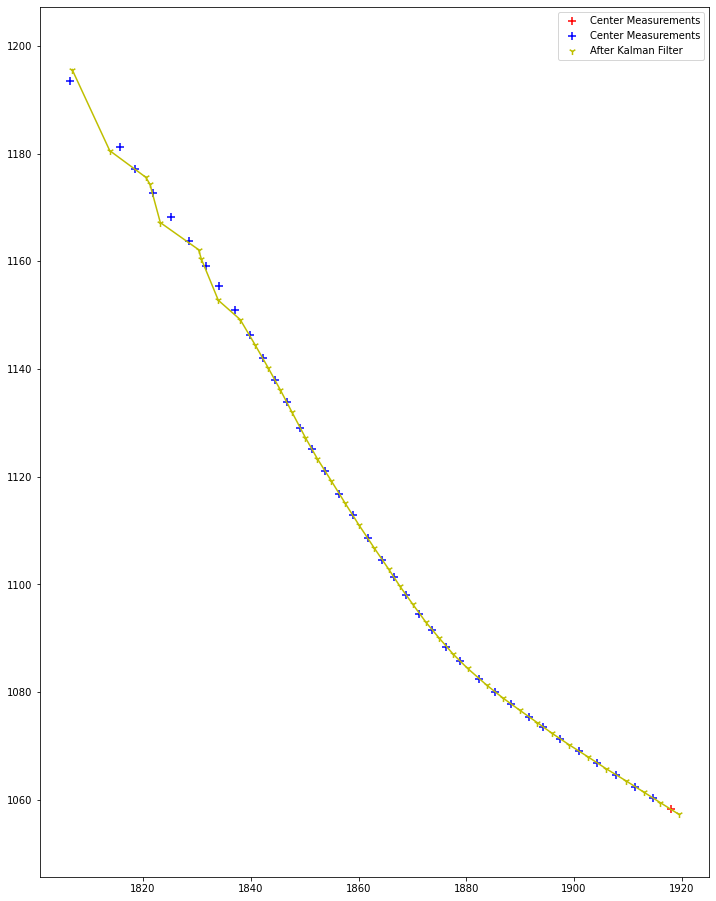

Index  42
0.13497975860270023
0.3125658129024935


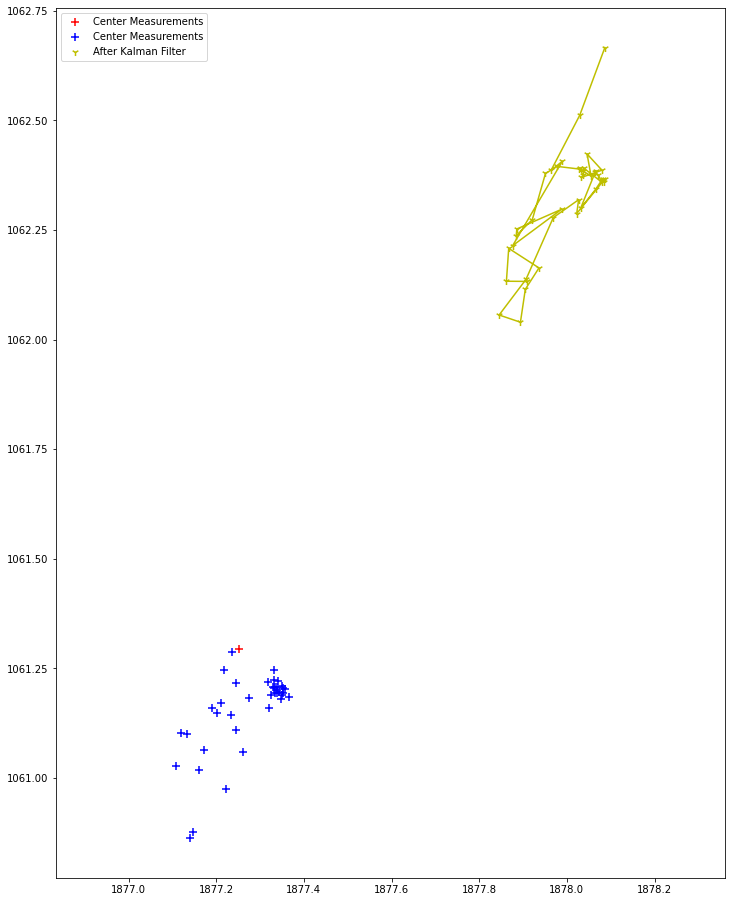

Index  43
0.13497975860270023
0.3125658129024935


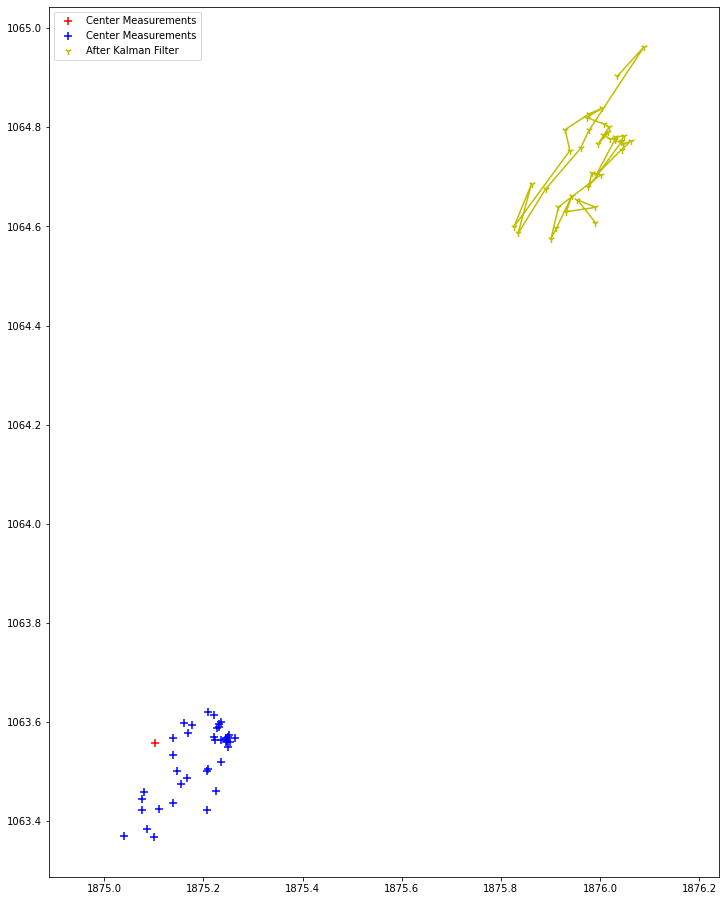

Index  44
0.13497975860270023
0.3125658129024935


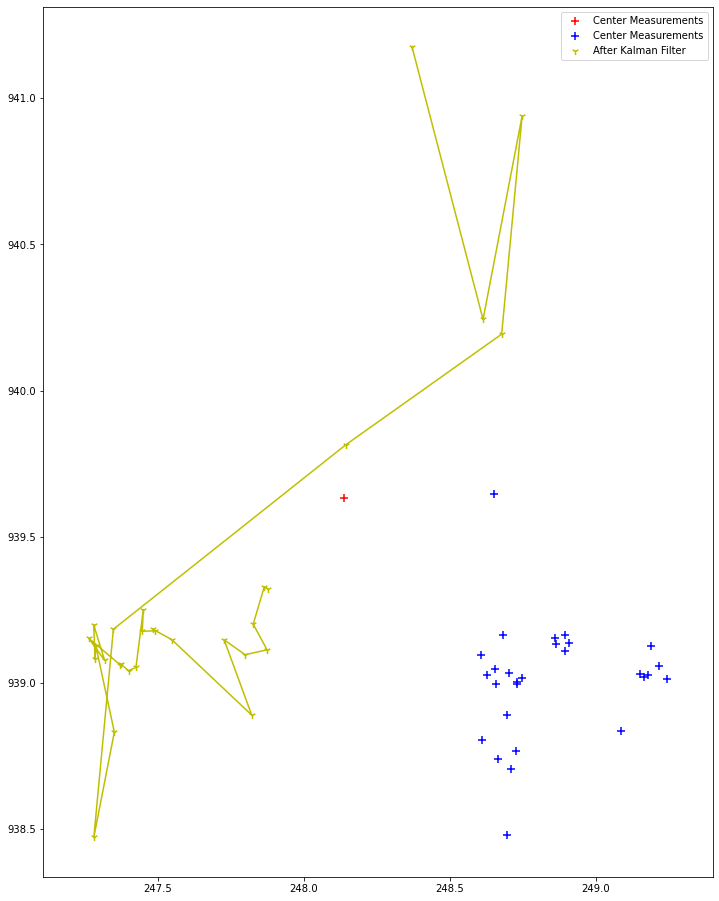

Index  45
0.13497975860270023
0.3125658129024935


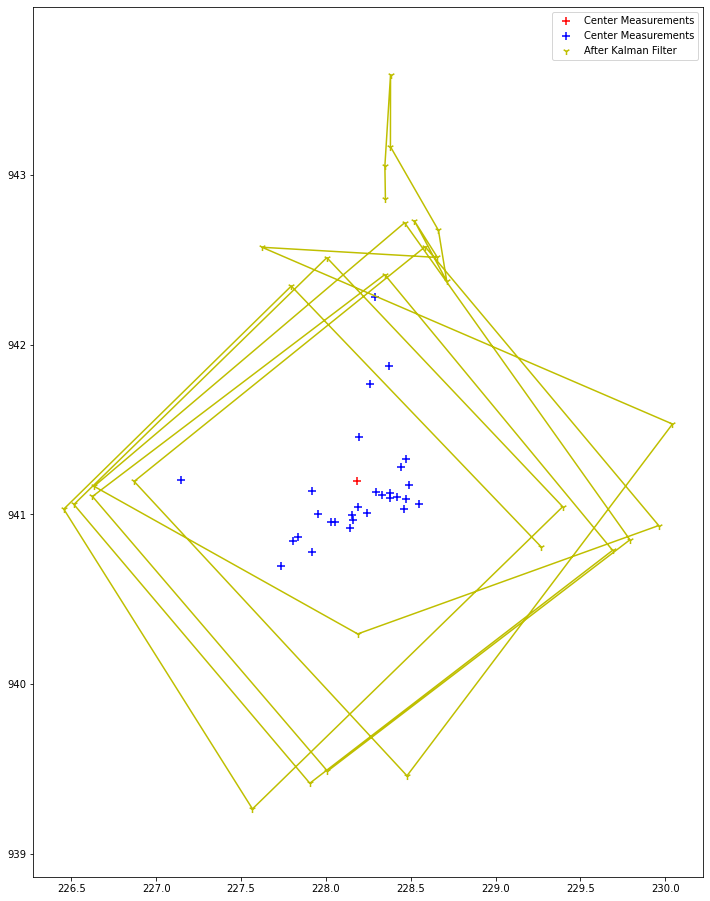

Index  46
0.13497975860270023
0.3125658129024935


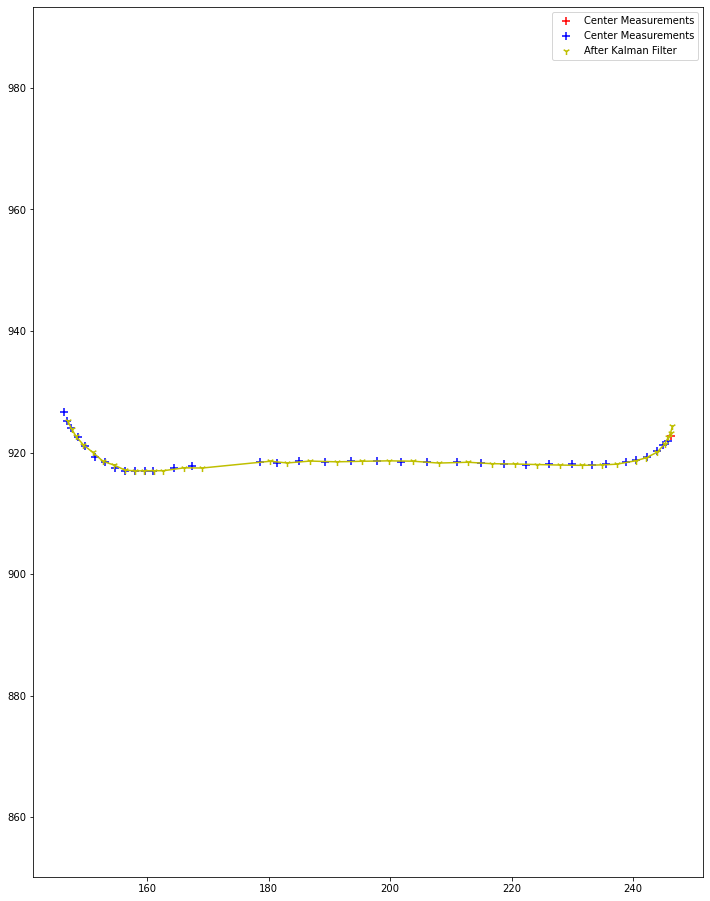

Index  47
0.13497975860270023
0.3125658129024935


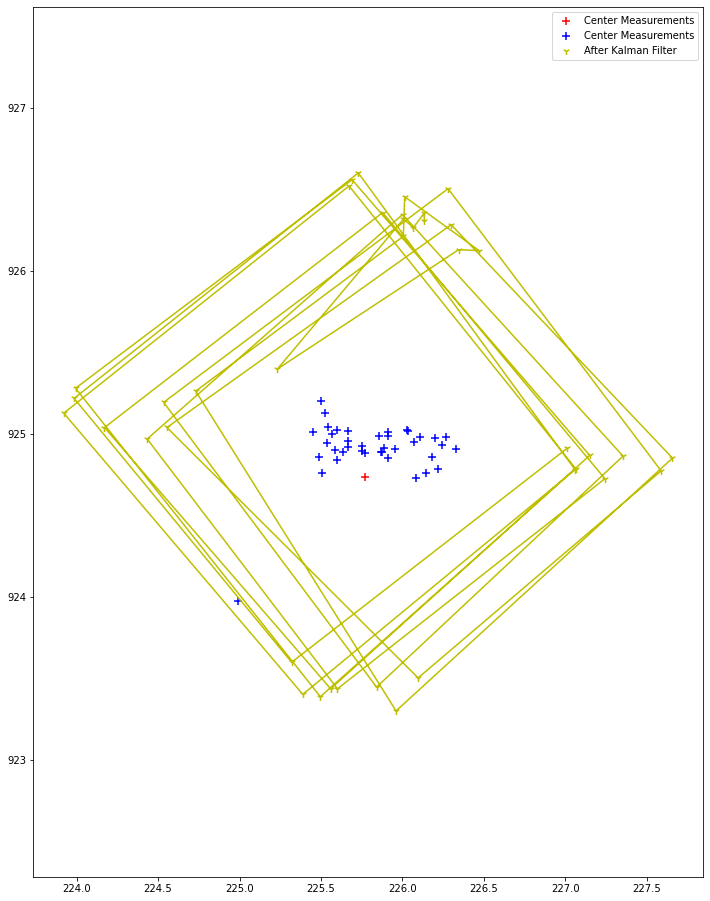

Index  48
0.13497975860270023
0.3125658129024935


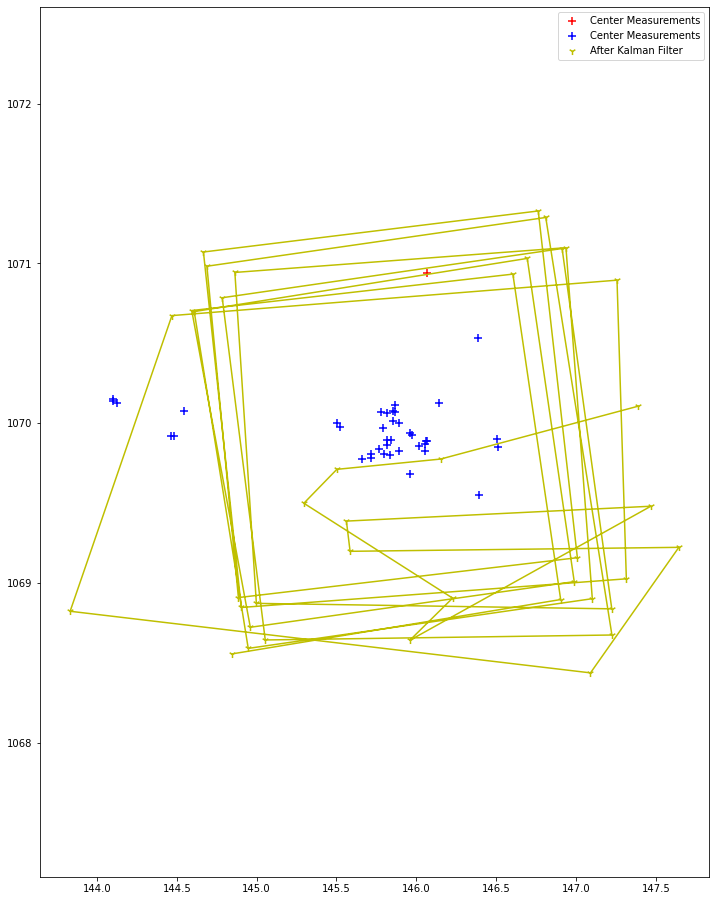

Index  49
0.13497975860270023
0.3125658129024935


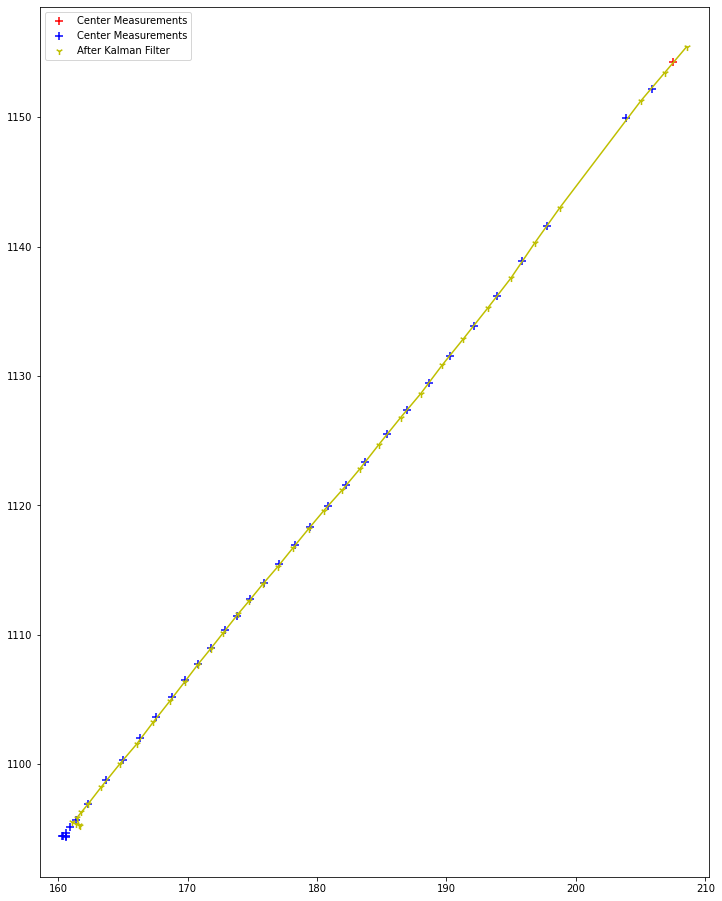

Index  50
0.13497975860270023
0.3125658129024935


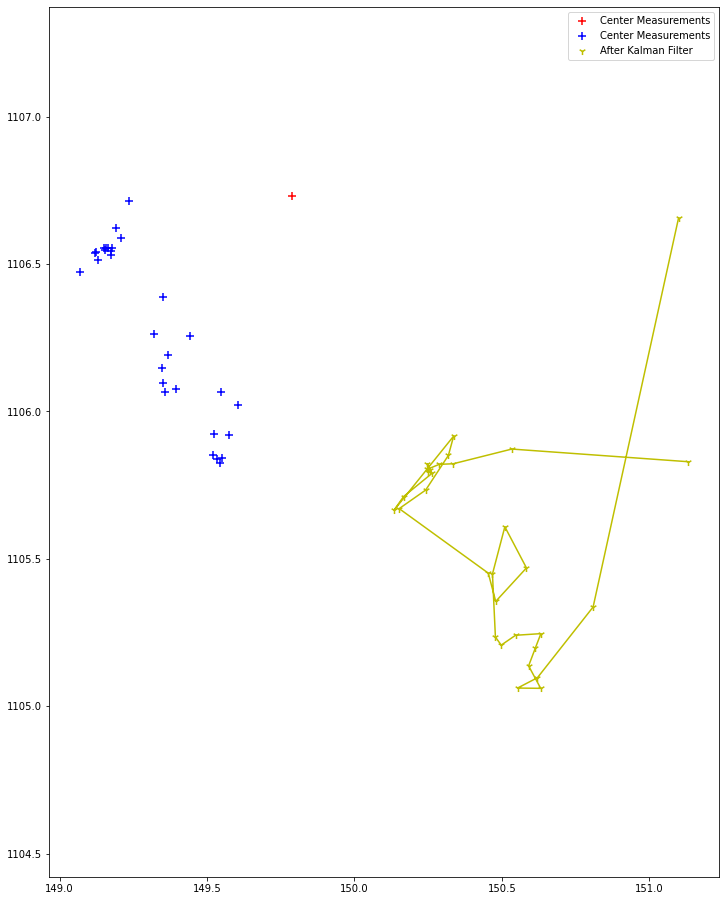

Index  51
0.13497975860270023
0.3125658129024935


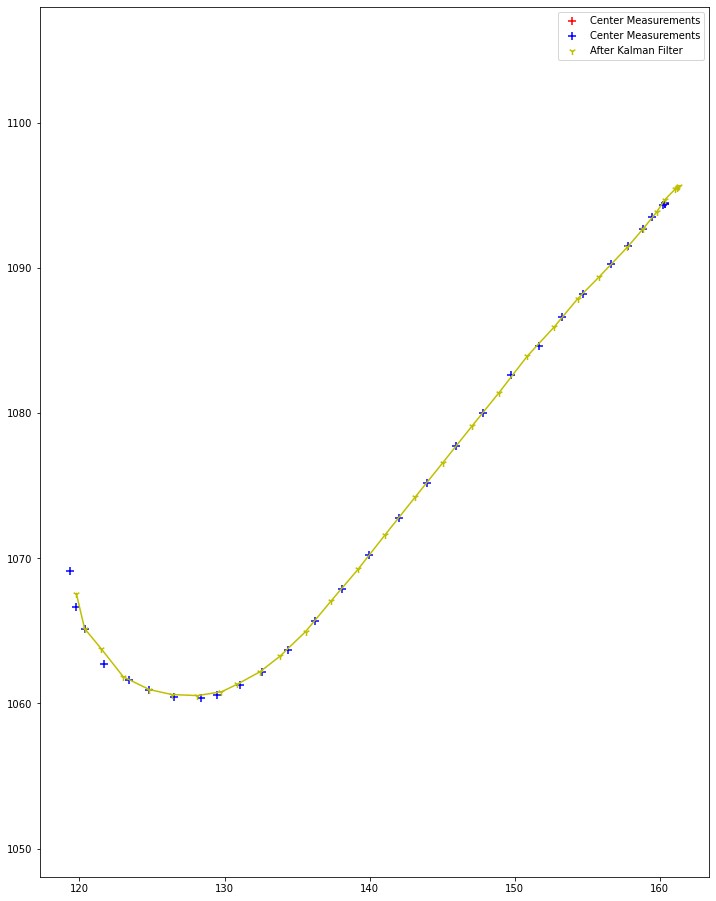

Index  52
0.13497975860270023
0.3125658129024935


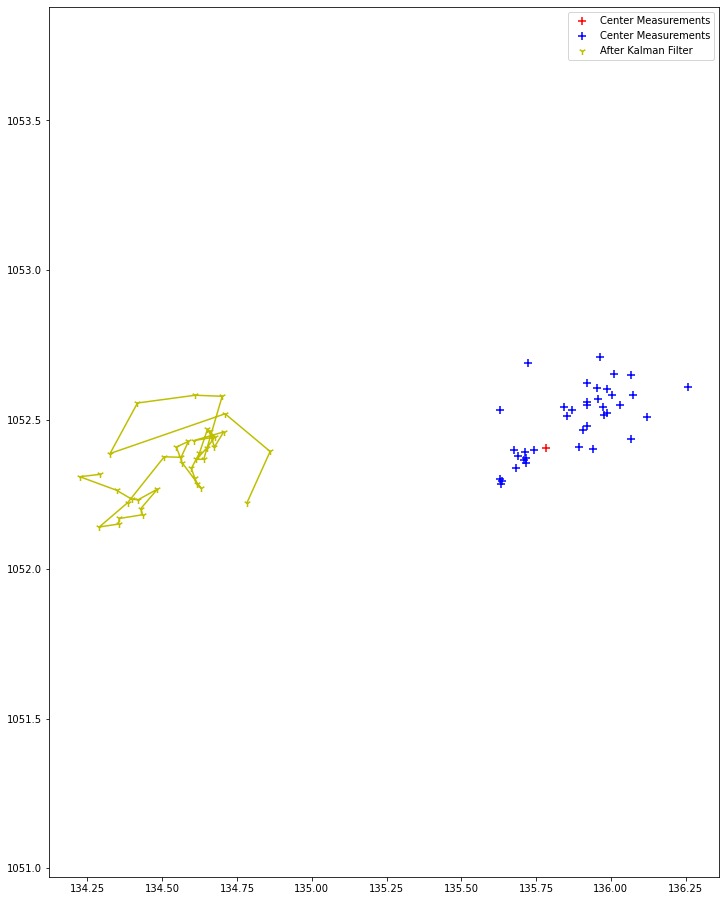

Index  53
0.13497975860270023
0.3125658129024935


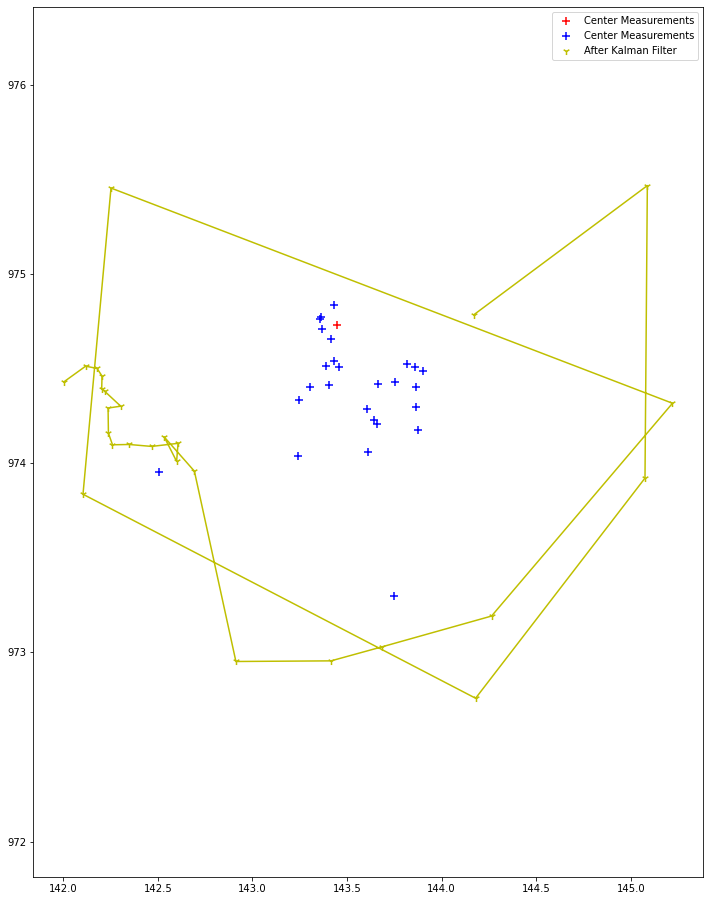

Index  54
0.13497975860270023
0.3125658129024935


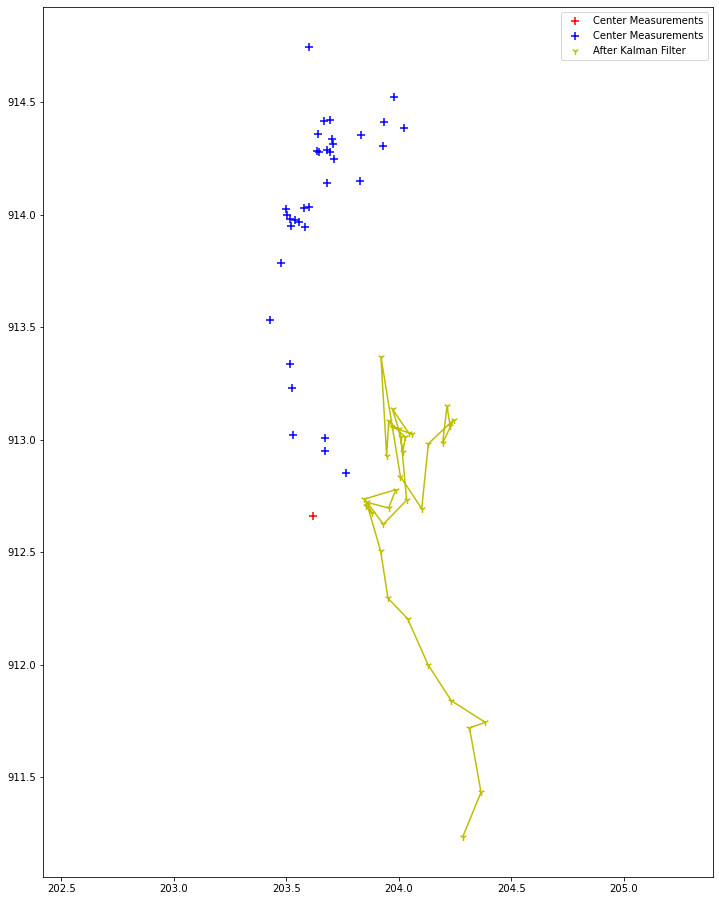

Index  55
0.13497975860270023
0.3125658129024935


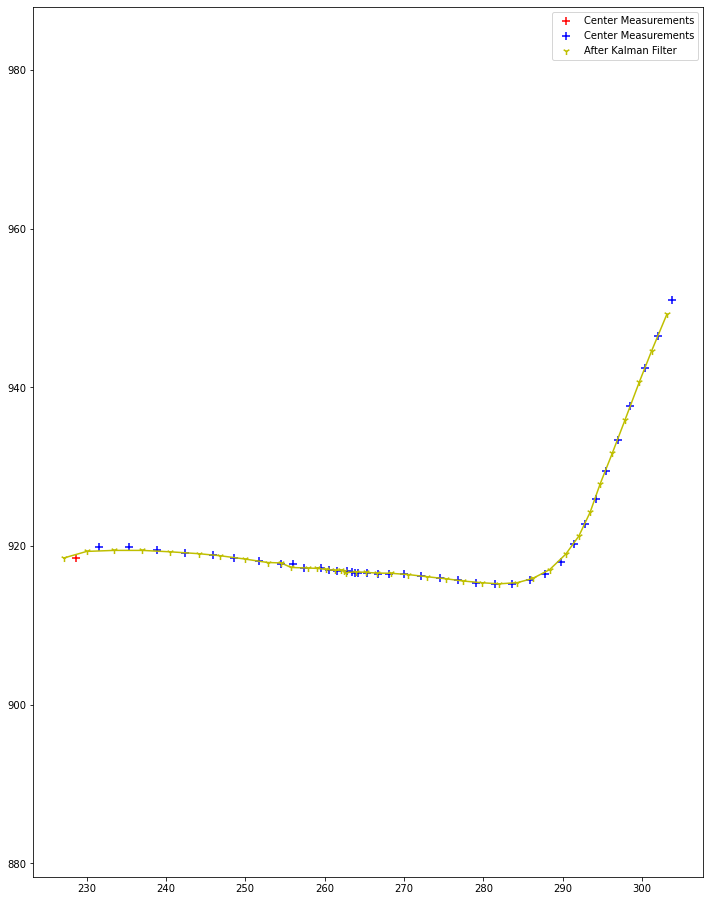

Index  56
0.13497975860270023
0.3125658129024935


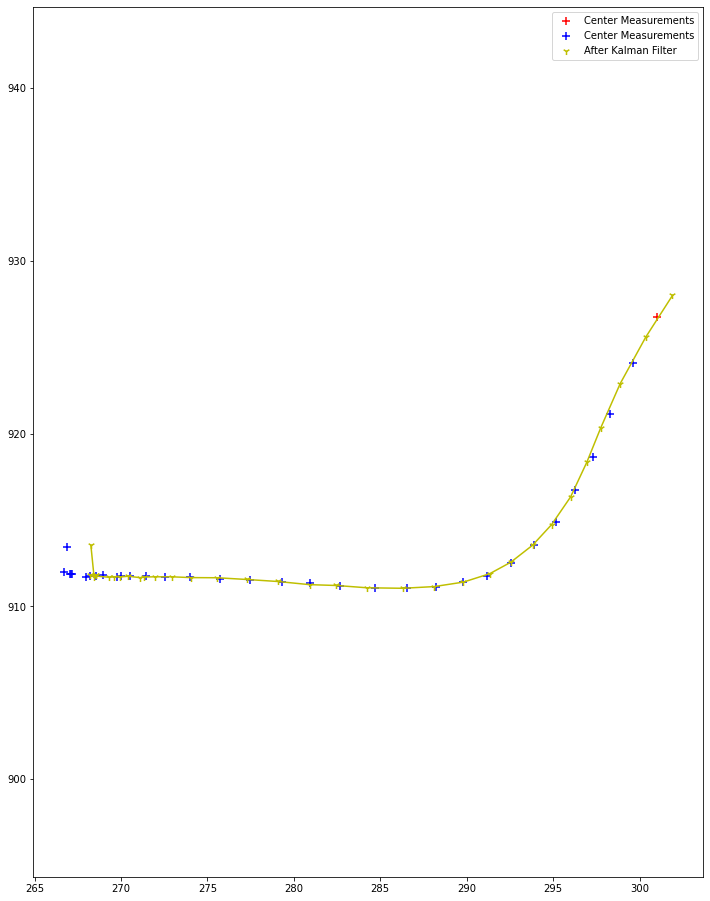

Index  57
0.13497975860270023
0.3125658129024935


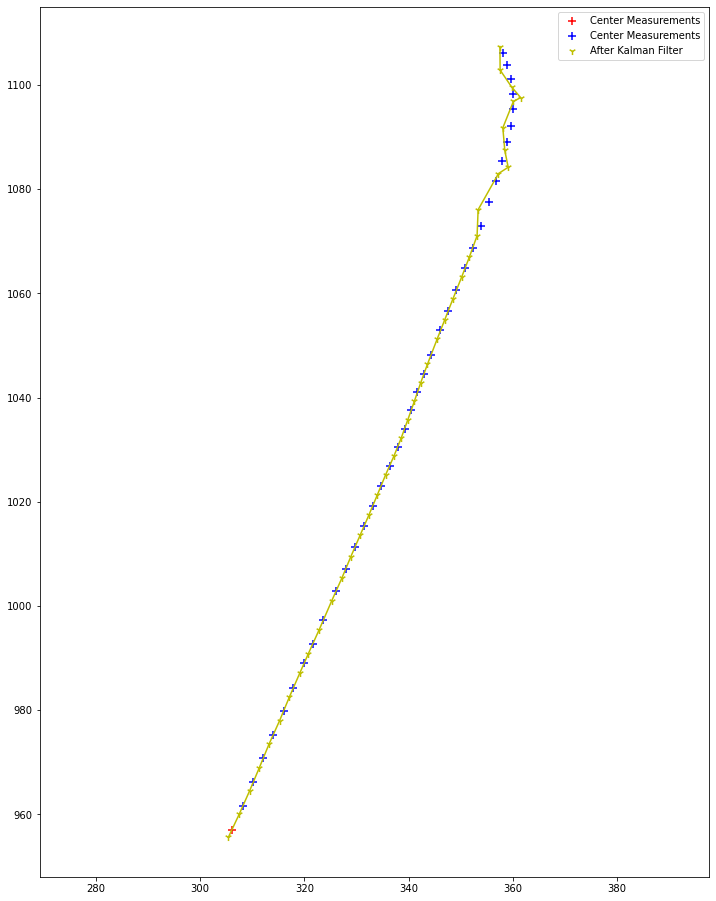

Index  58
0.13497975860270023
0.3125658129024935


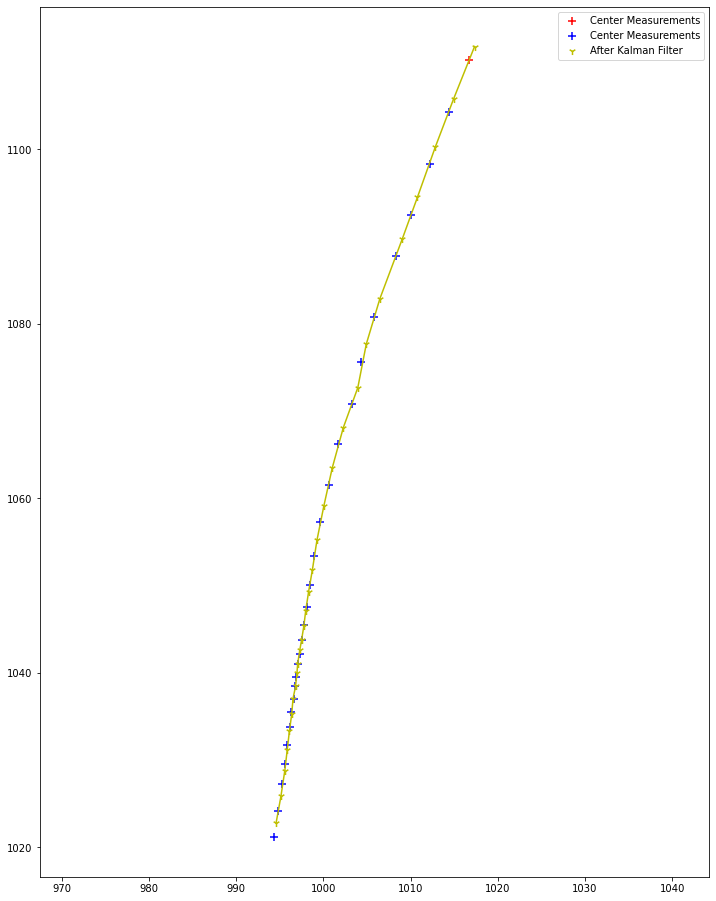

Index  59
0.13497975860270023
0.3125658129024935


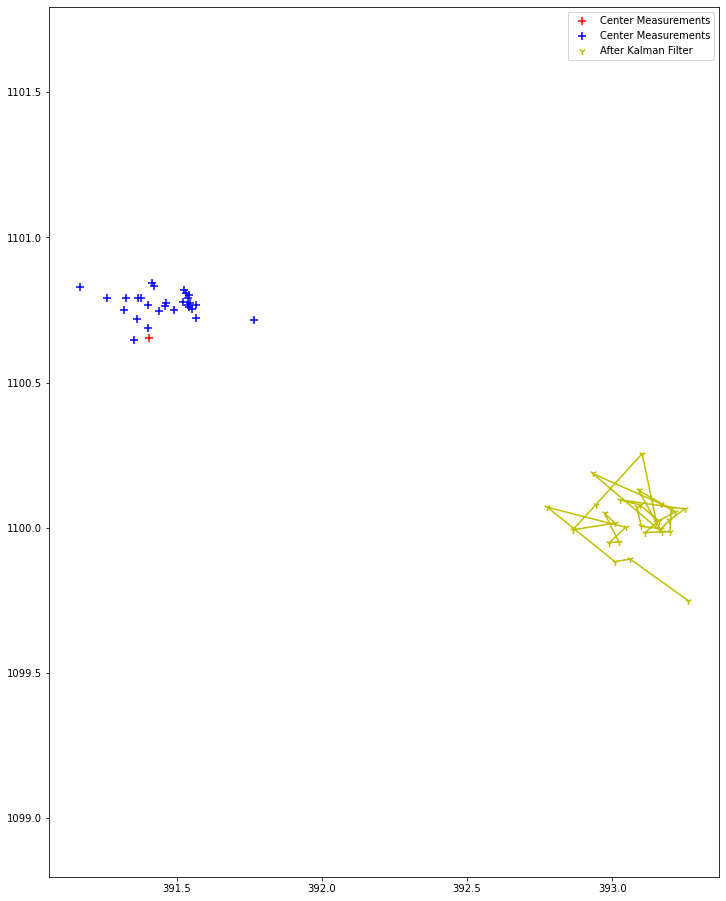

Index  60
0.13497975860270023
0.3125658129024935


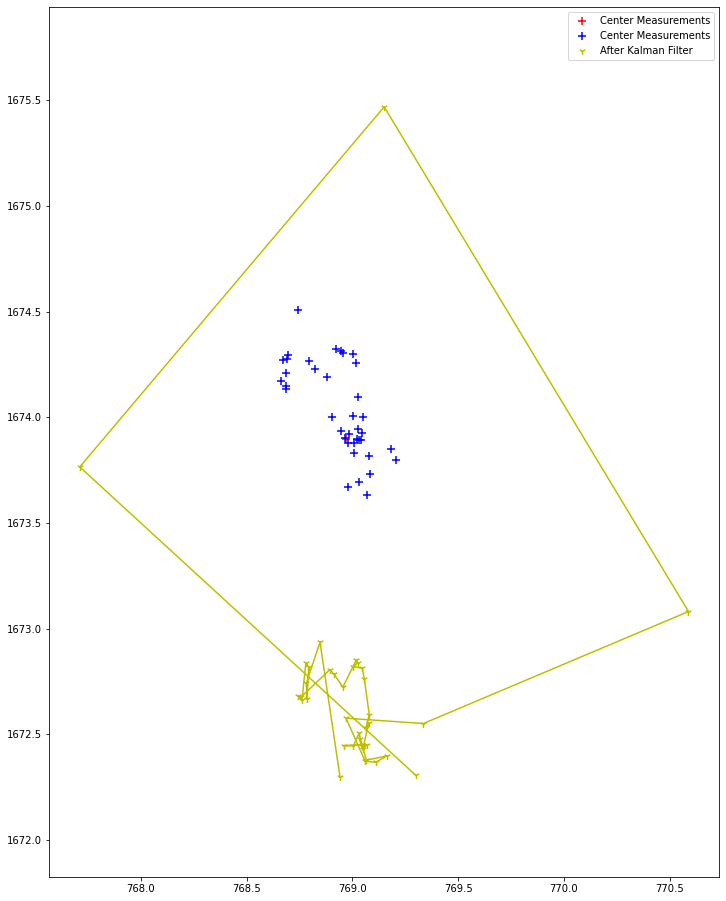

Index  61
0.13497975860270023
0.3125658129024935


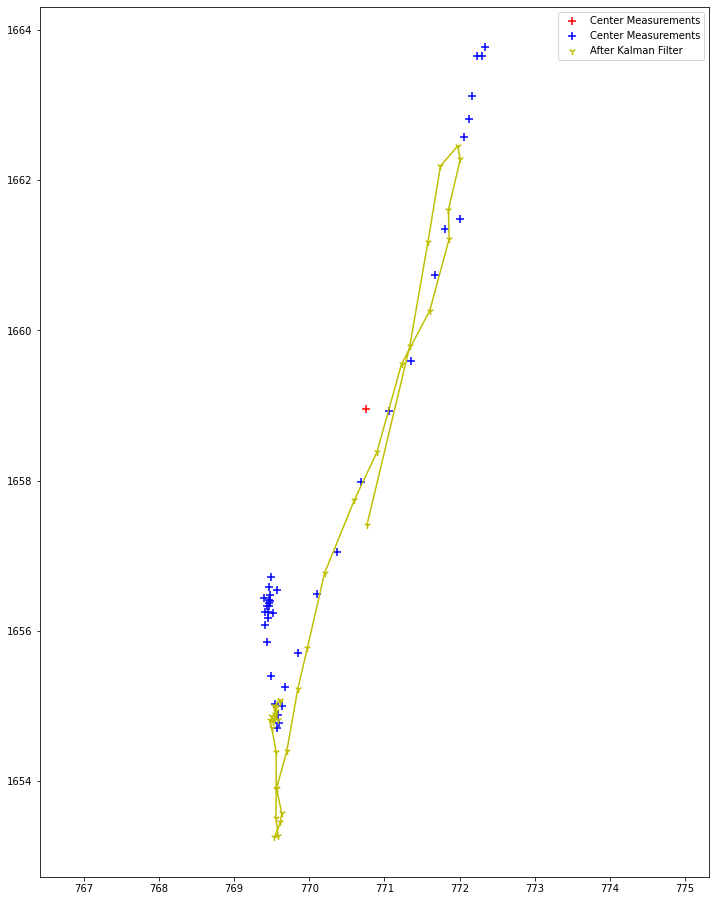

Index  62
0.13497975860270023
0.3125658129024935


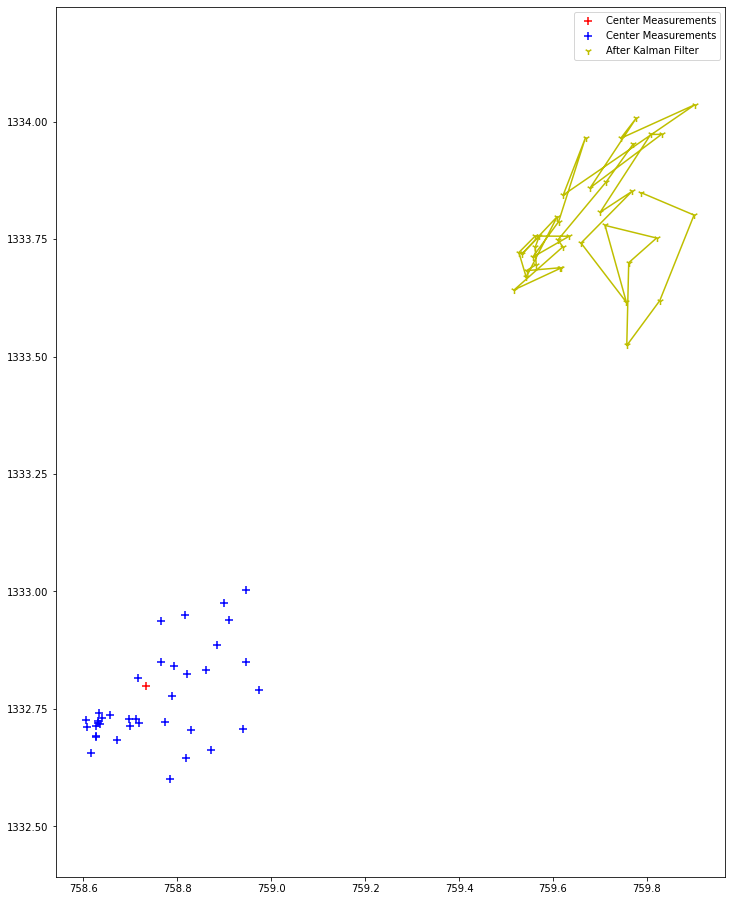

Index  63
0.13497975860270023
0.3125658129024935


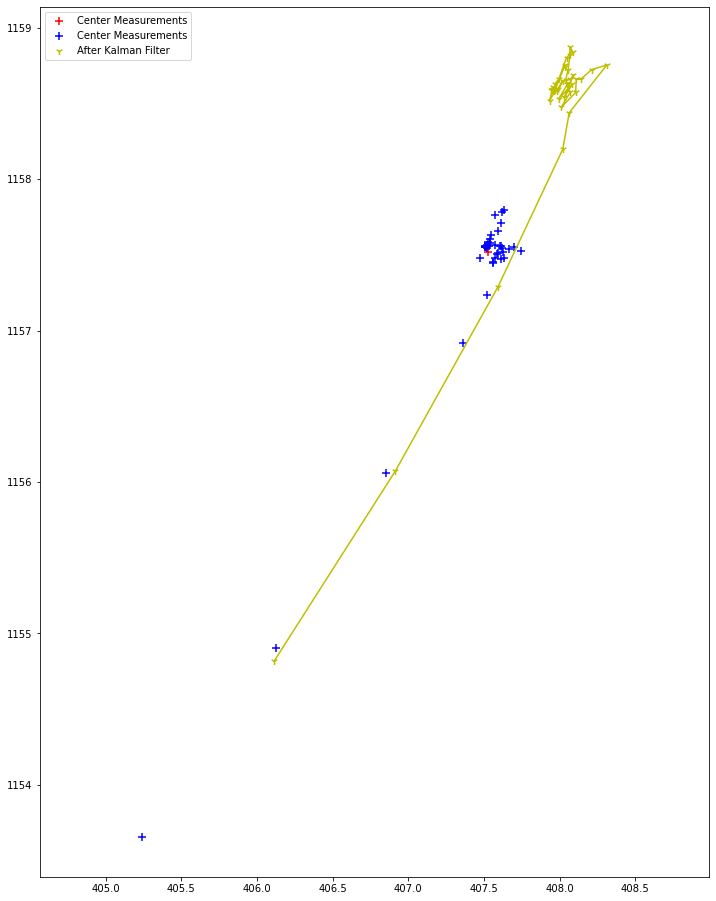

Index  64
0.13497975860270023
0.3125658129024935


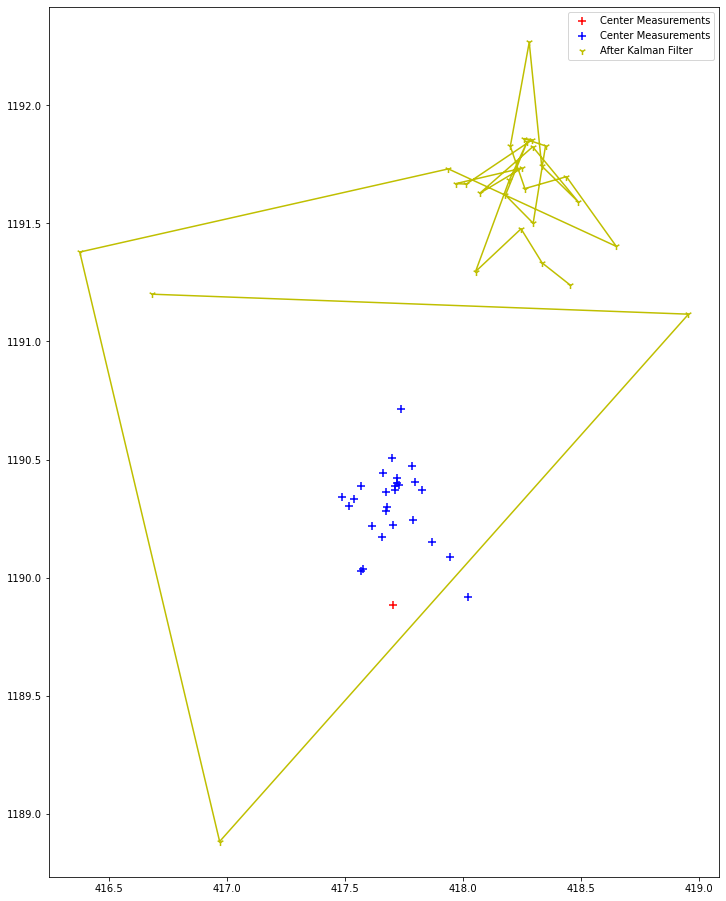

Index  65
0.13497975860270023
0.3125658129024935


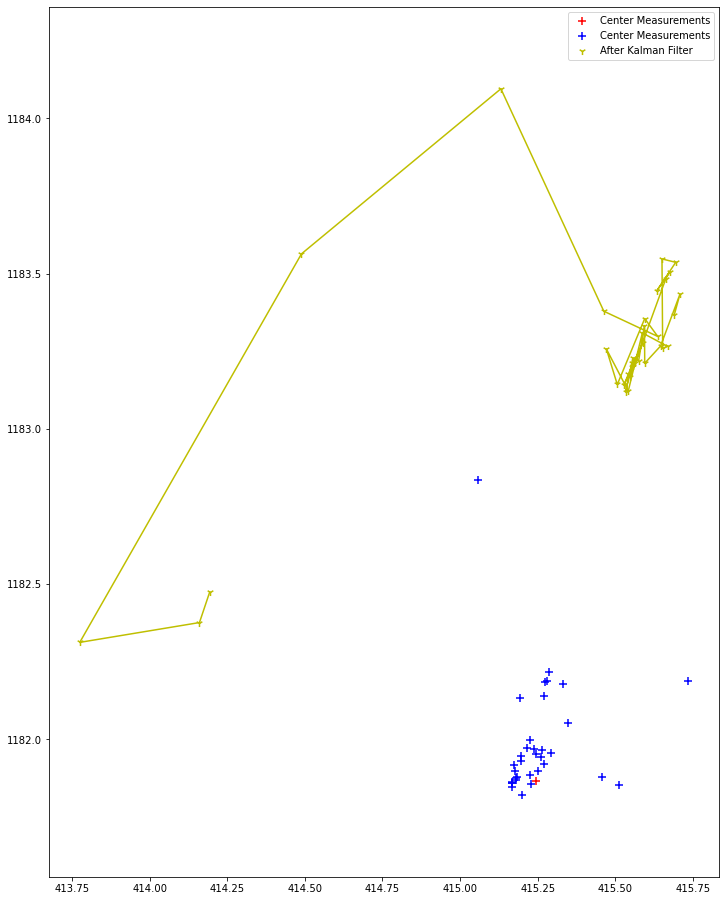

Index  66
0.13497975860270023
0.3125658129024935


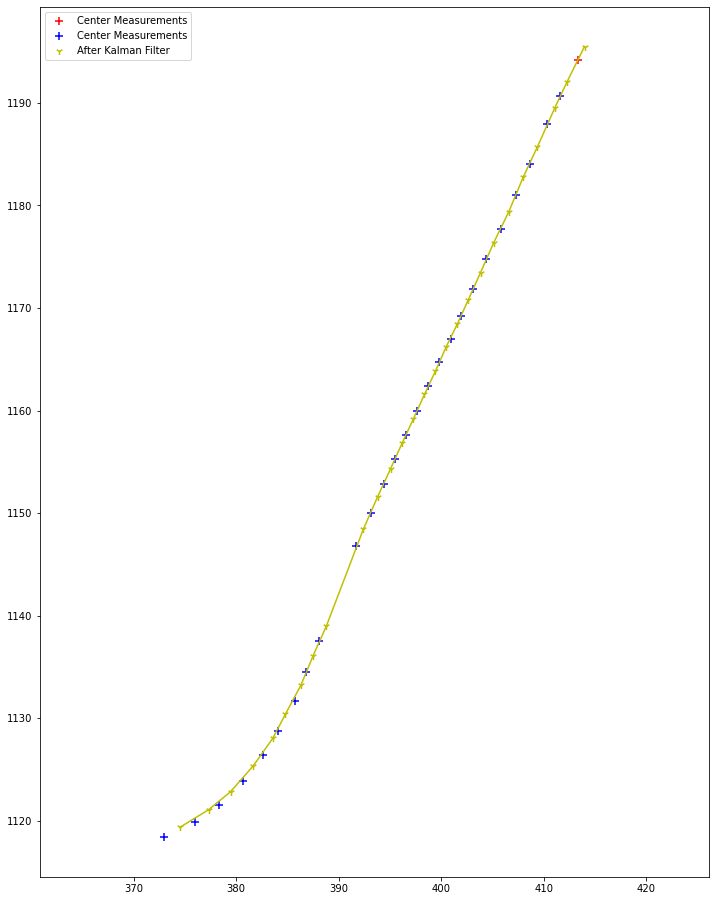

Index  67
0.13497975860270023
0.3125658129024935


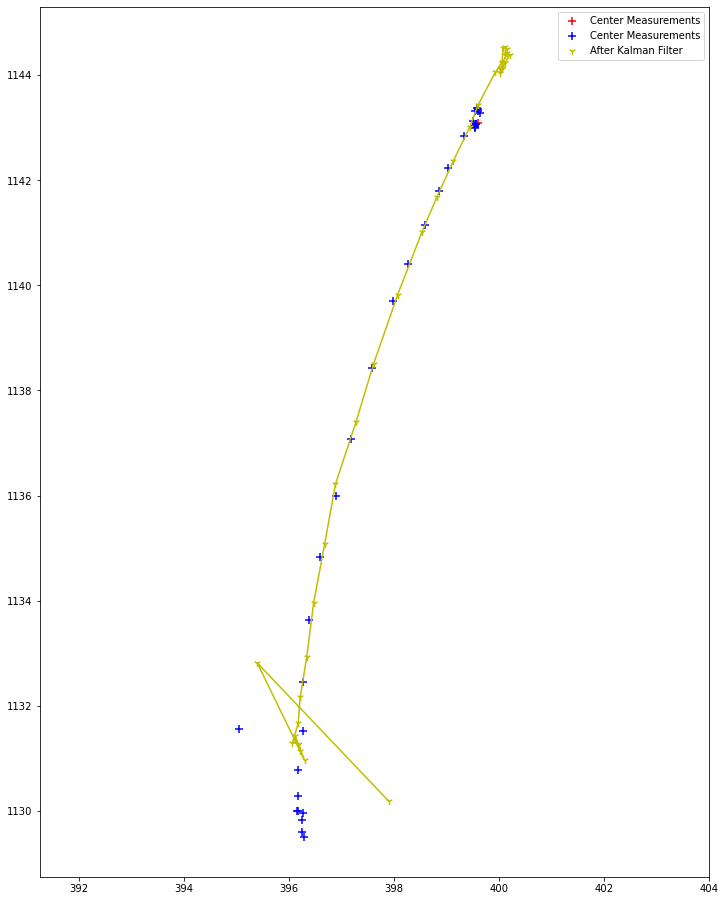

Index  68
0.13497975860270023
0.3125658129024935


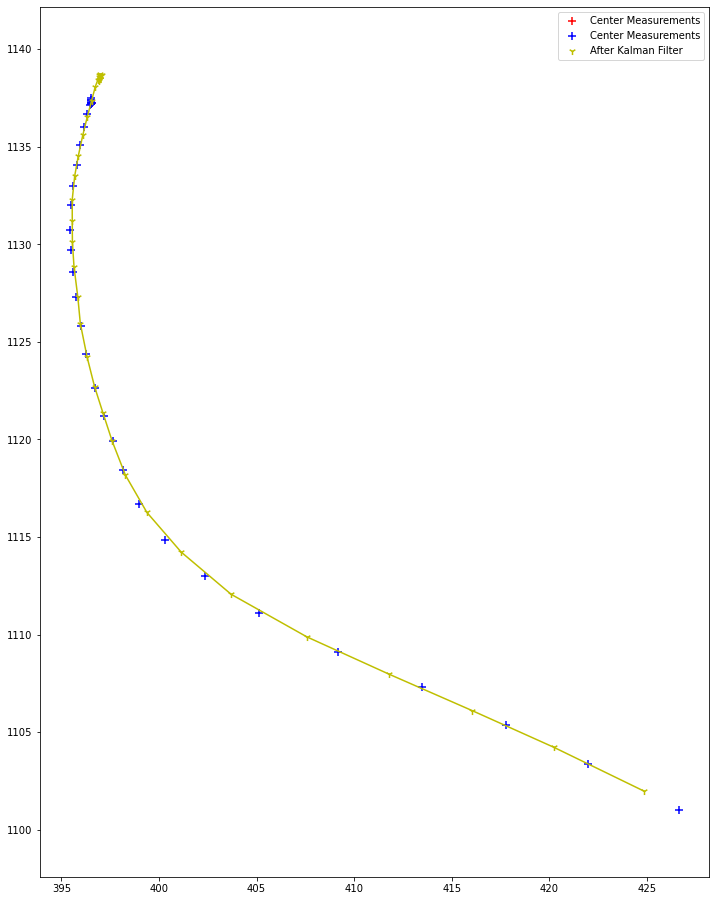

Index  69
0.13497975860270023
0.3125658129024935


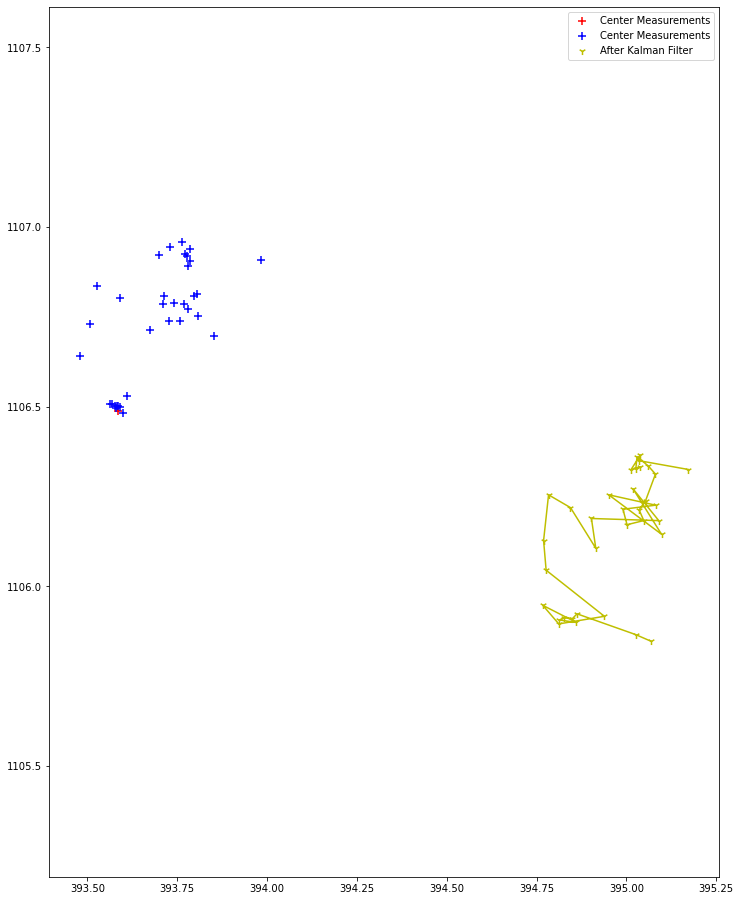

Index  70
0.13497975860270023
0.3125658129024935


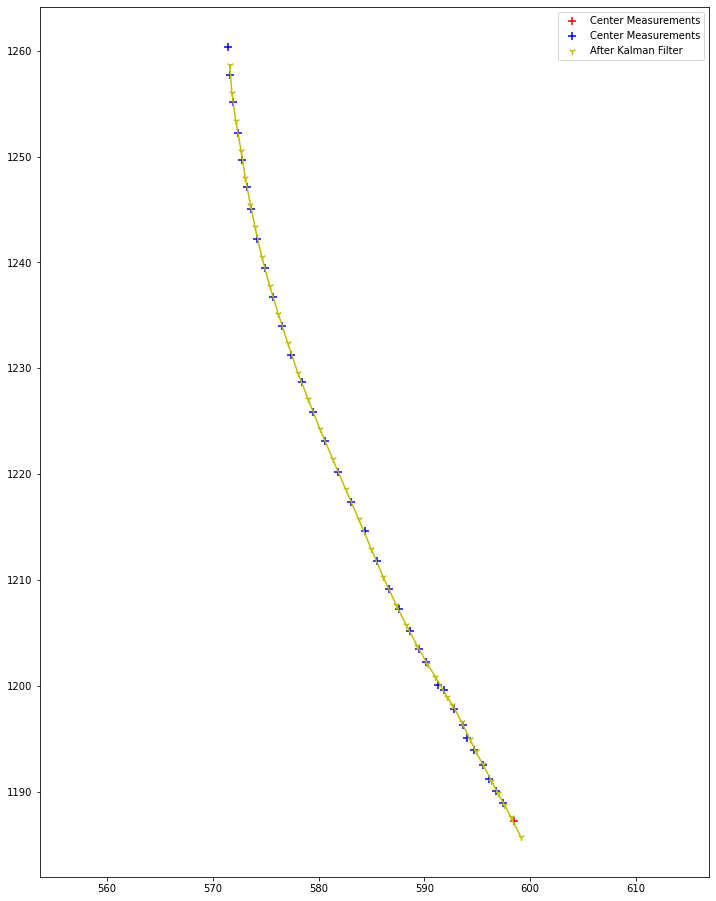

Index  71
0.13497975860270023
0.3125658129024935


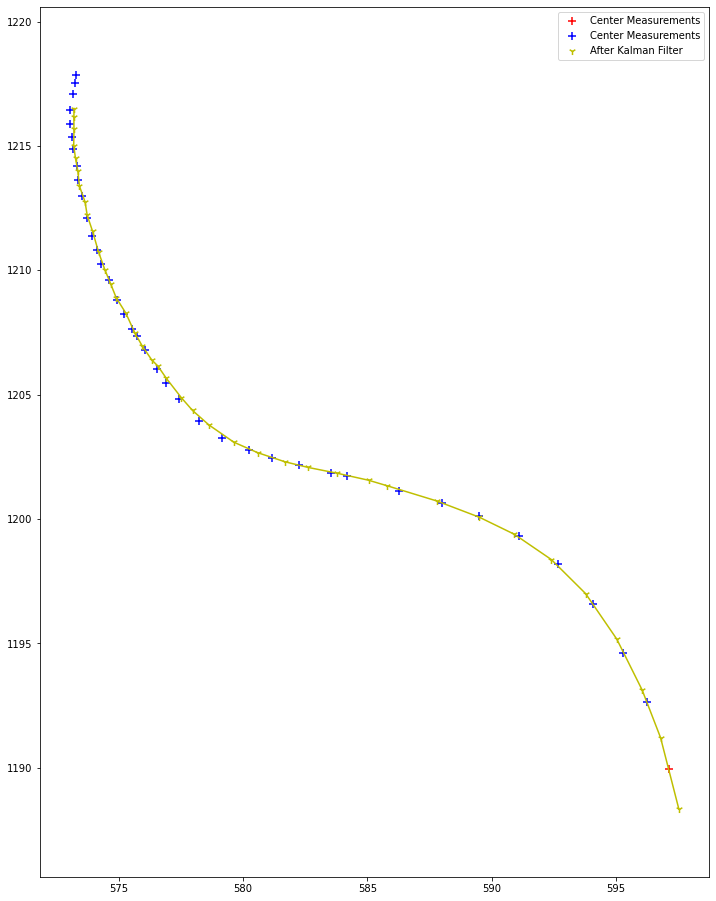

Index  72
0.13497975860270023
0.3125658129024935


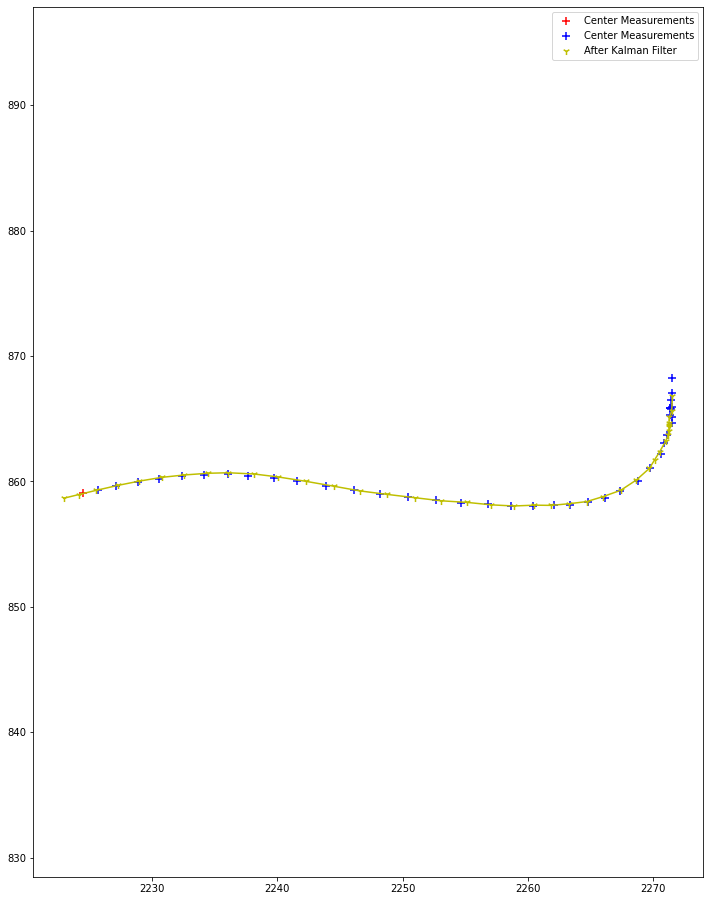

Index  73
0.13497975860270023
0.3125658129024935


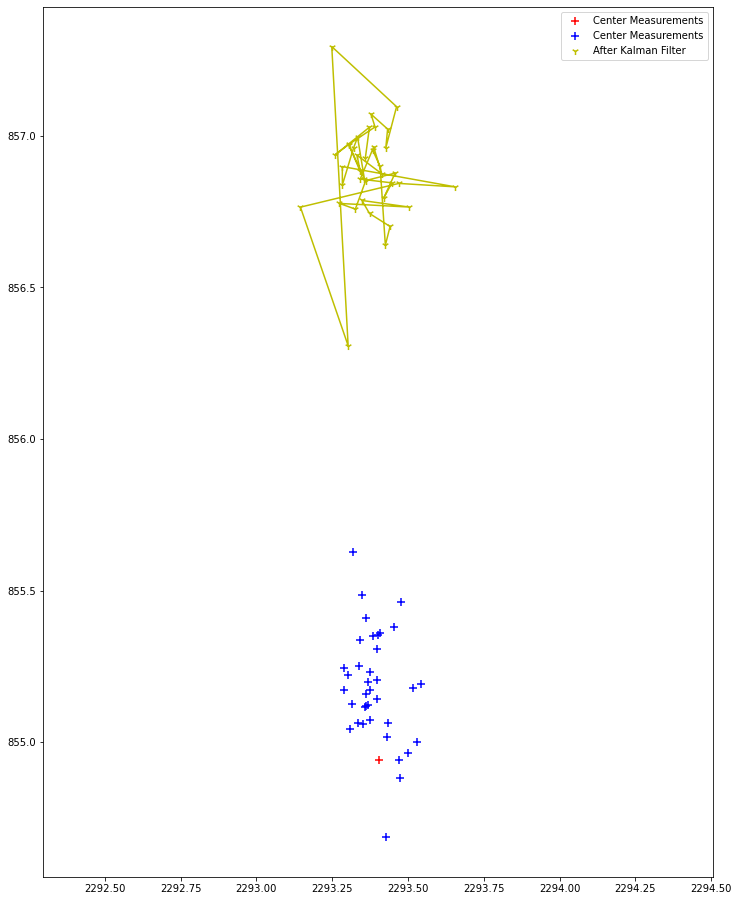

Index  74
0.13497975860270023
0.3125658129024935


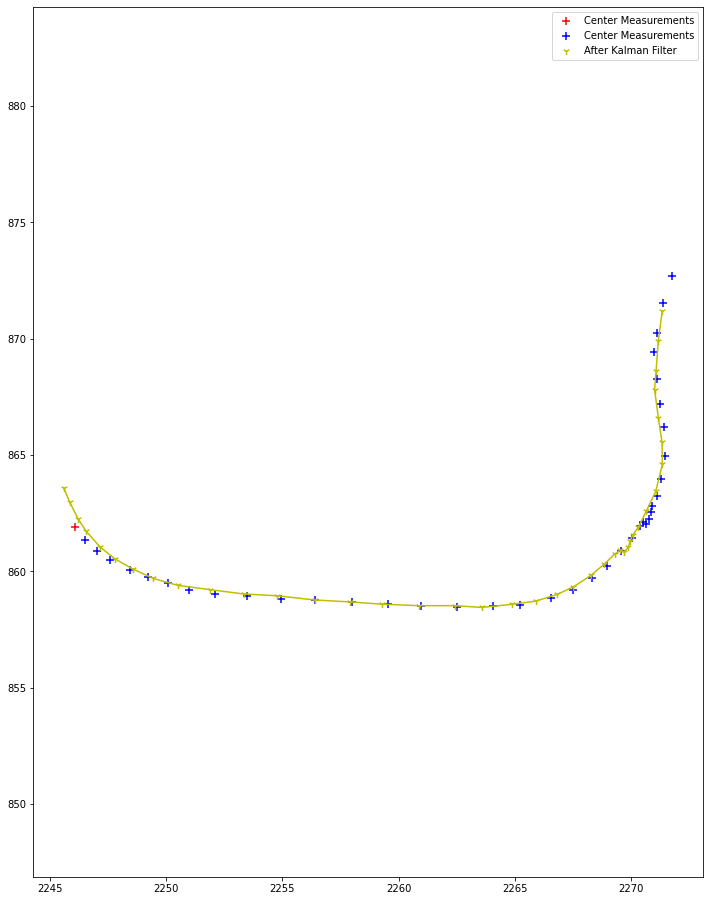

Index  75
0.13497975860270023
0.3125658129024935


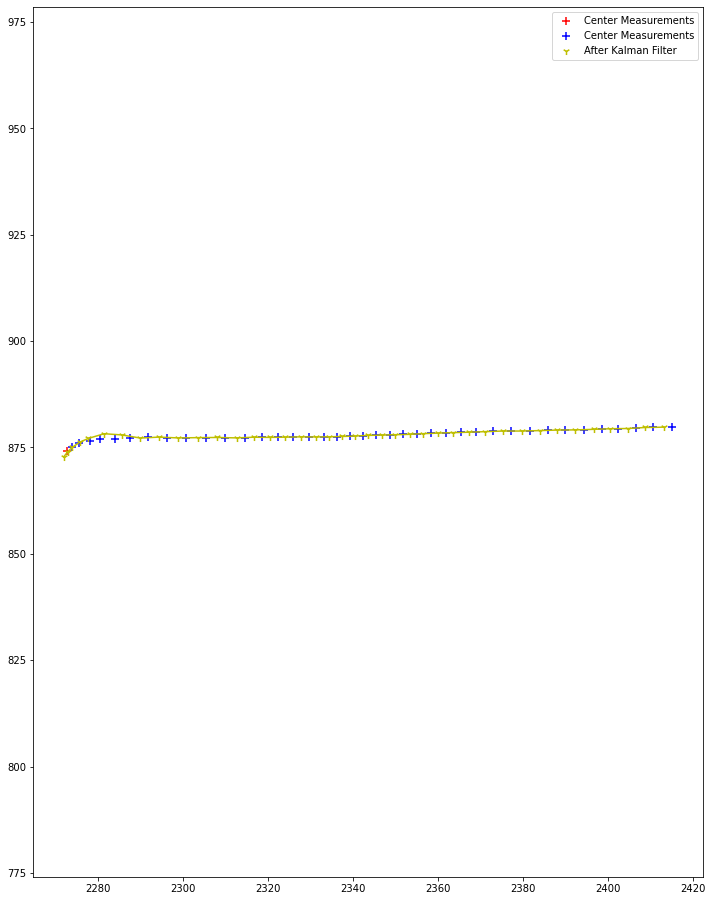

Index  76
0.13497975860270023
0.3125658129024935


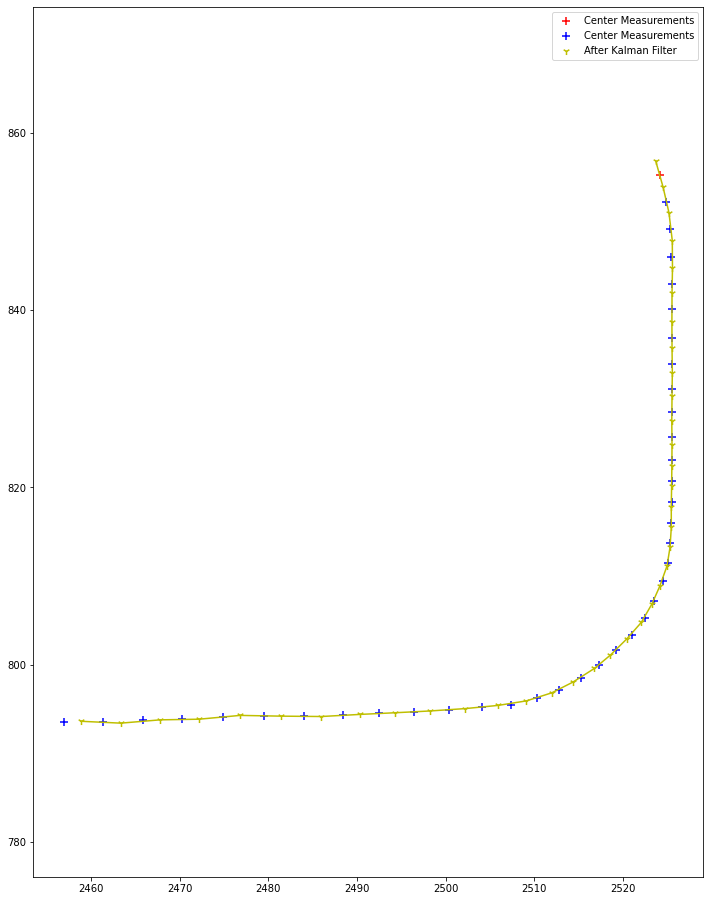

Index  77
0.13497975860270023
0.3125658129024935


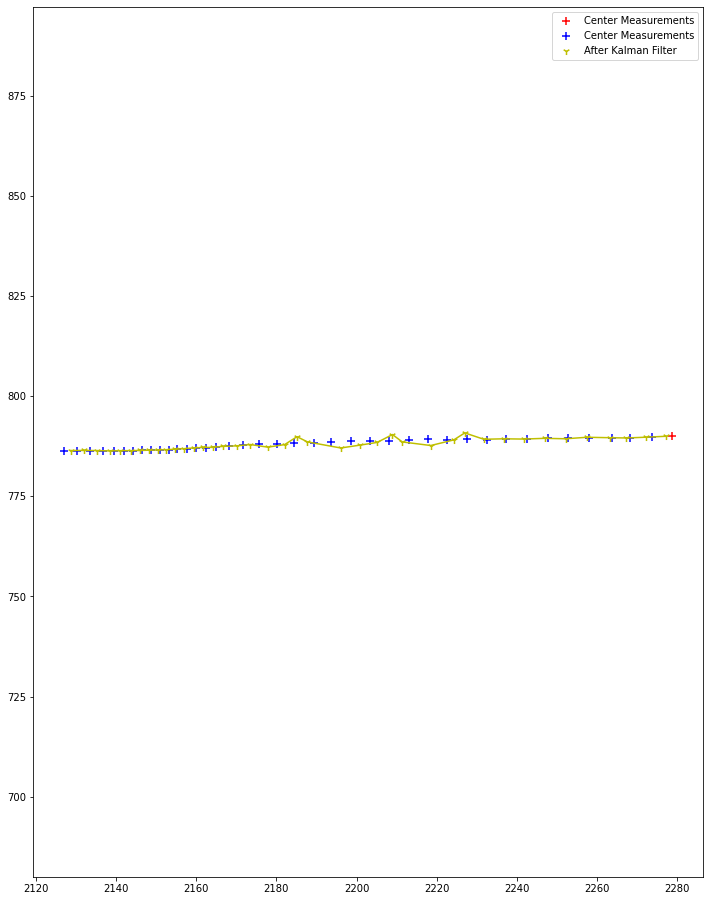

Index  78
0.13497975860270023
0.3125658129024935


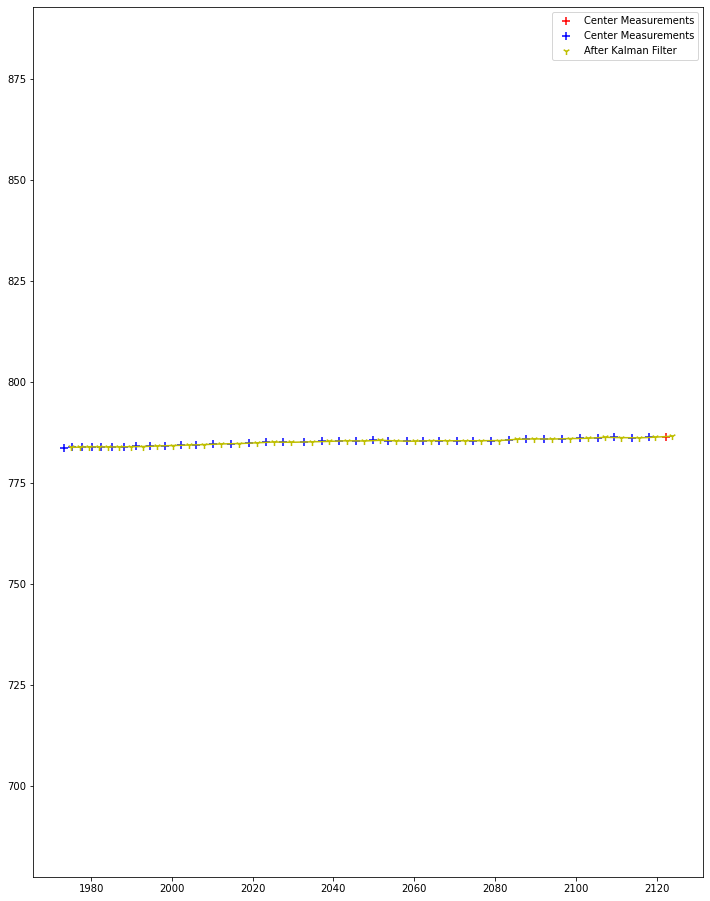

Index  79
0.13497975860270023
0.3125658129024935


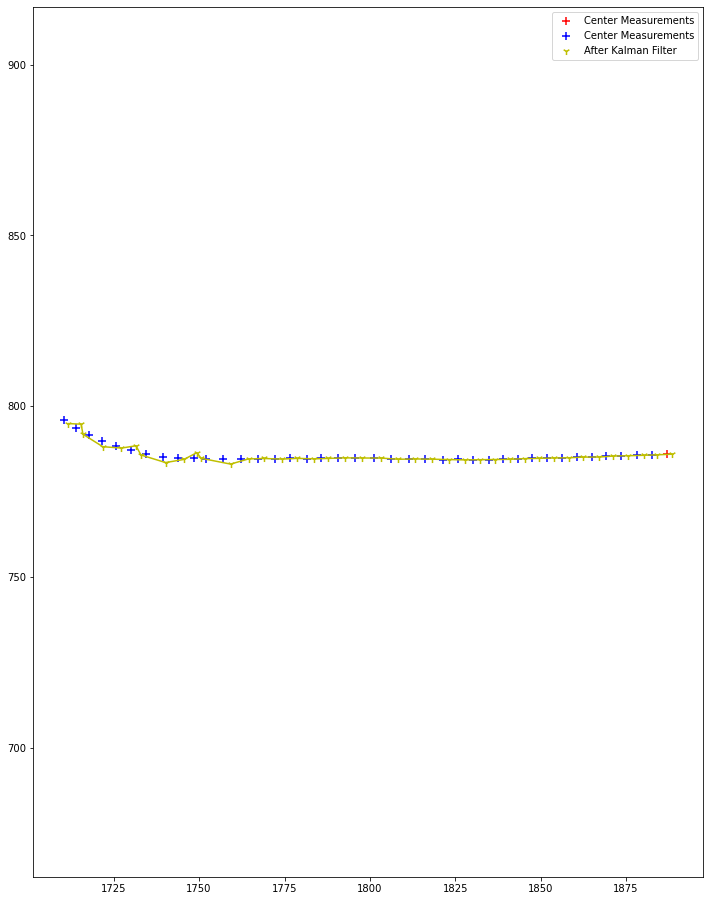

Index  80
0.13497975860270023
0.3125658129024935


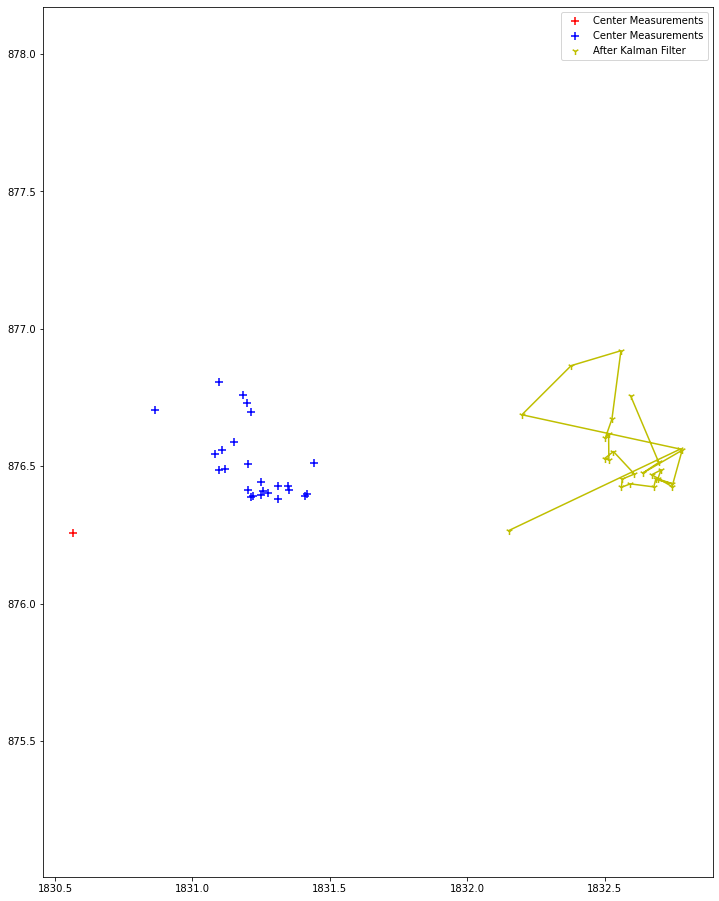

Index  81
0.13497975860270023
0.3125658129024935


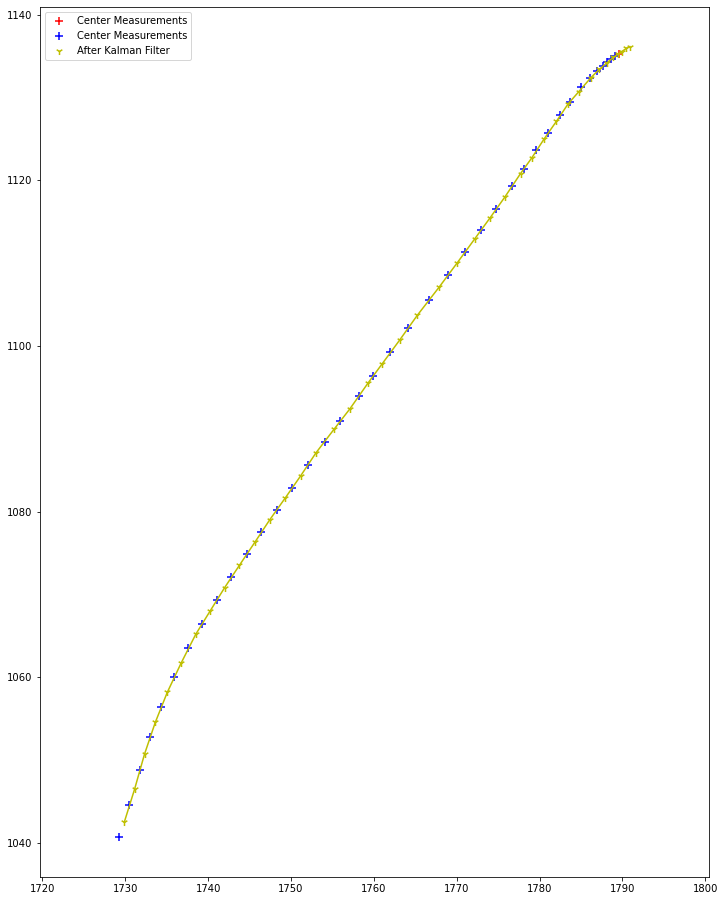

Index  82
0.13497975860270023
0.3125658129024935


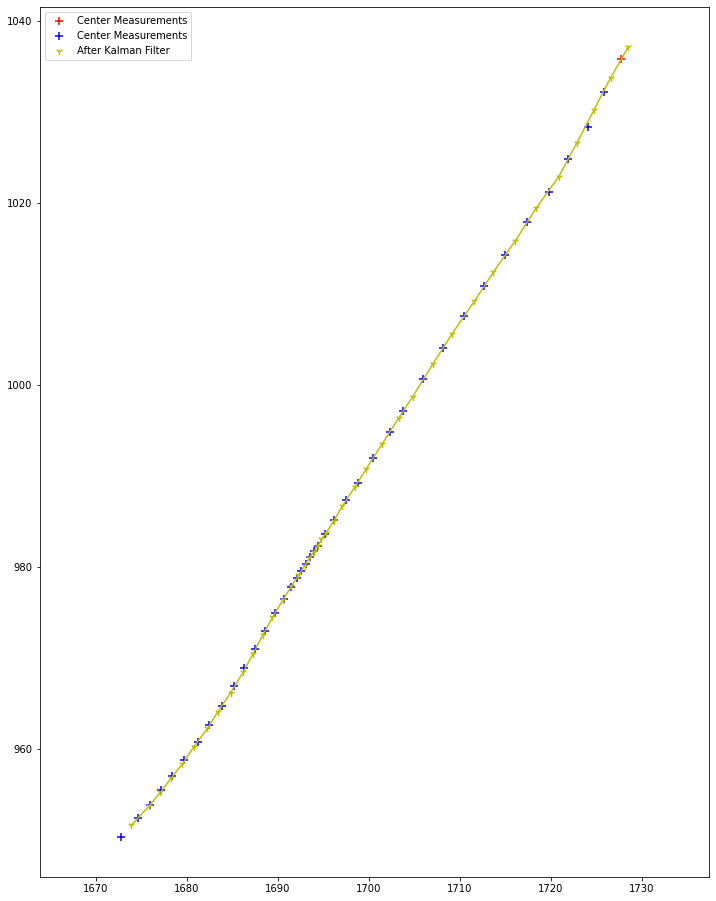

Index  83
0.13497975860270023
0.3125658129024935


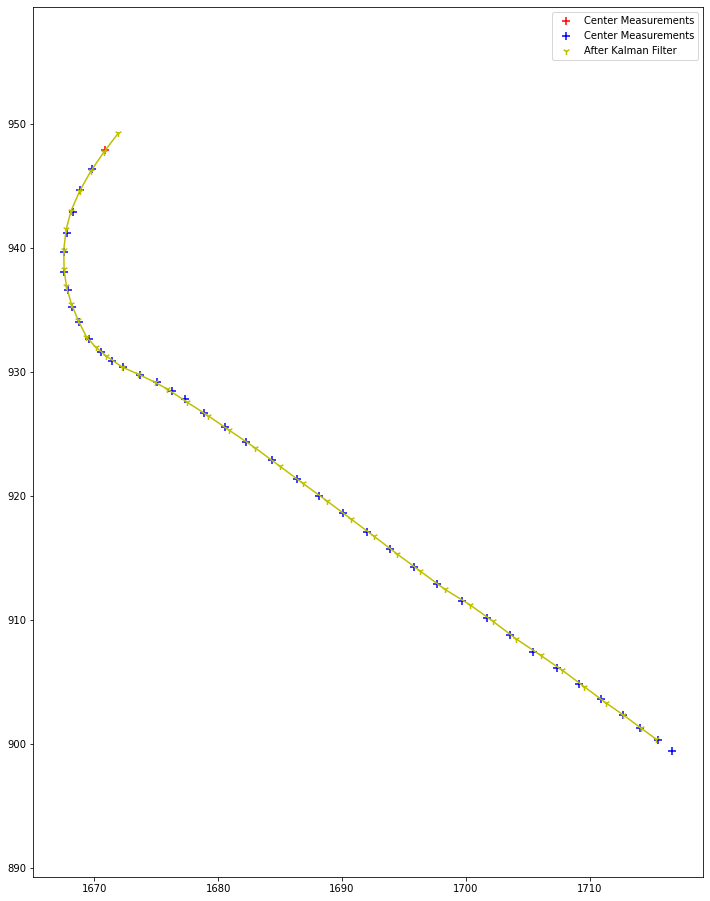

Index  84
0.13497975860270023
0.3125658129024935


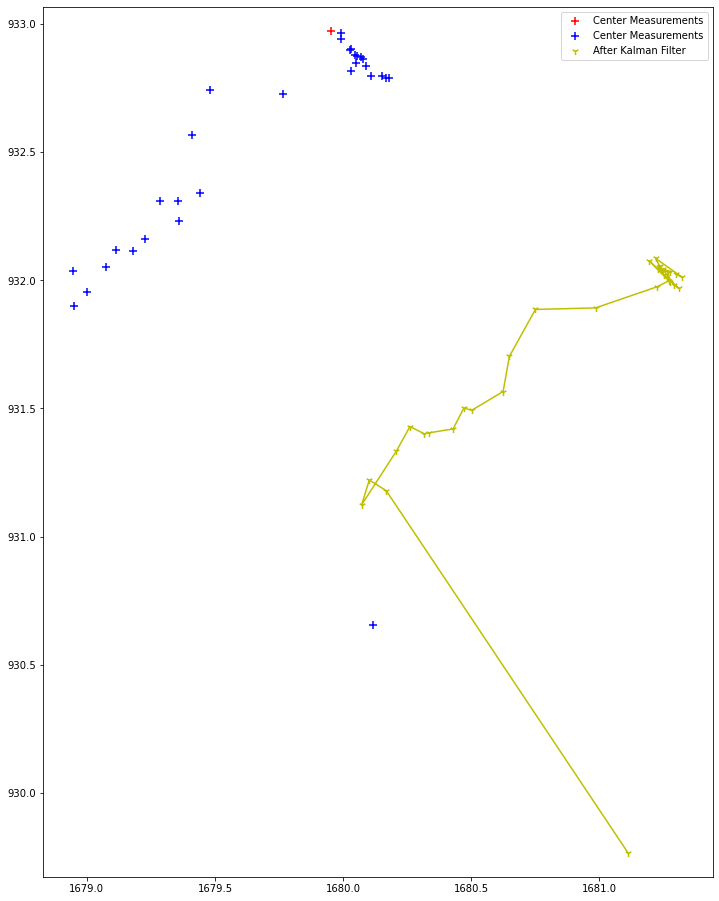

Index  85
0.13497975860270023
0.3125658129024935


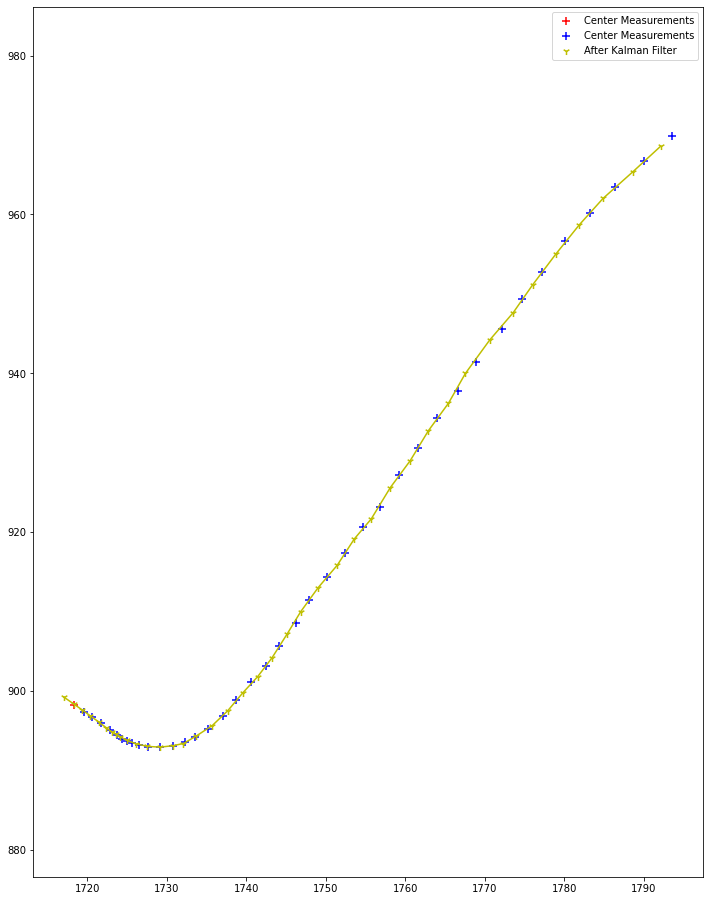

Index  86
0.13497975860270023
0.3125658129024935


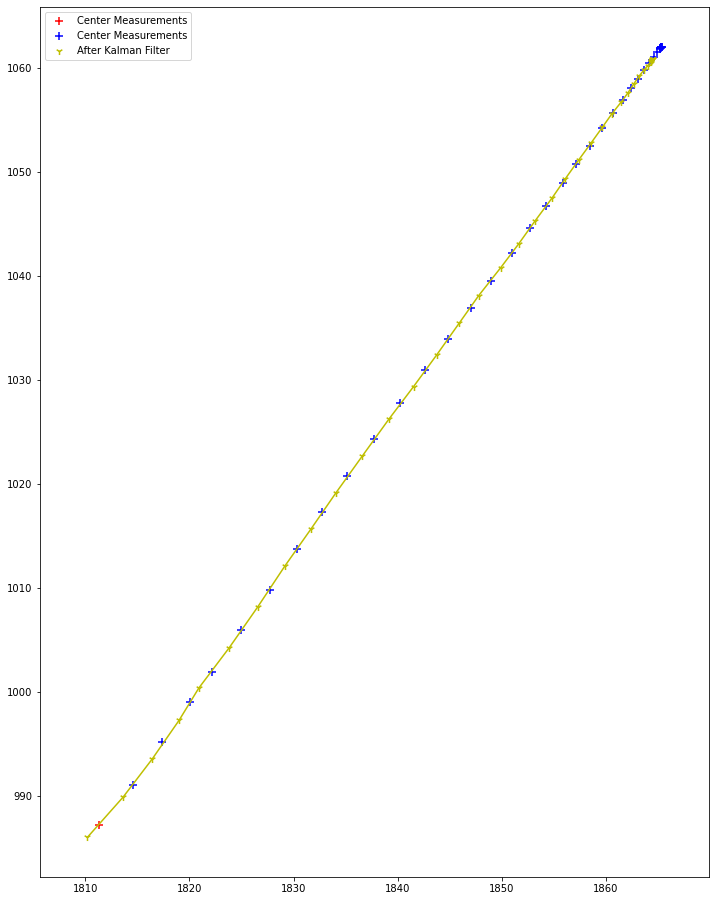

Index  87
0.13497975860270023
0.3125658129024935


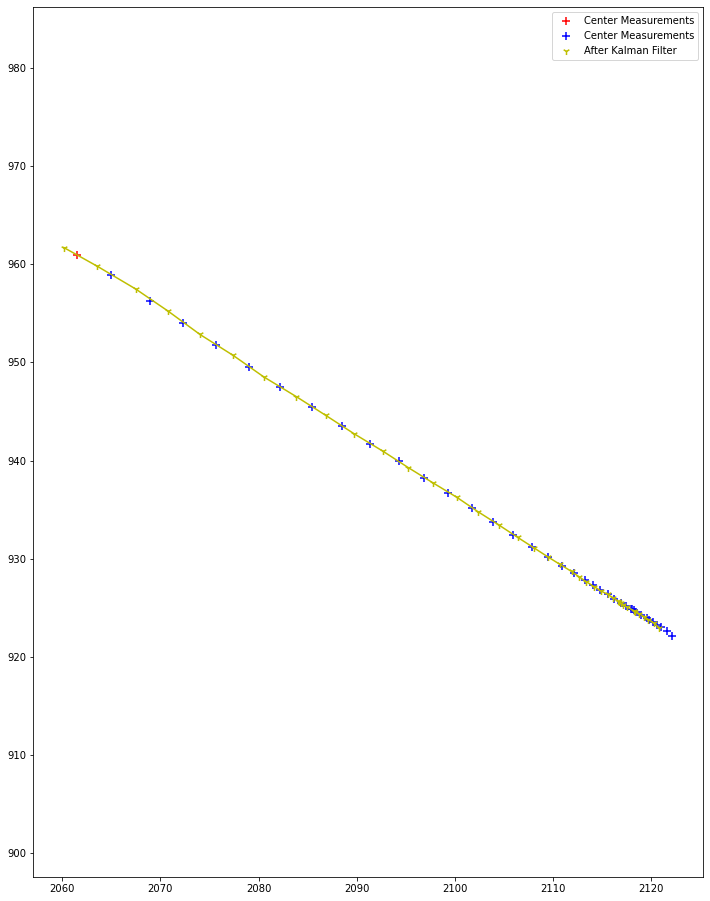

Index  88
0.13497975860270023
0.3125658129024935


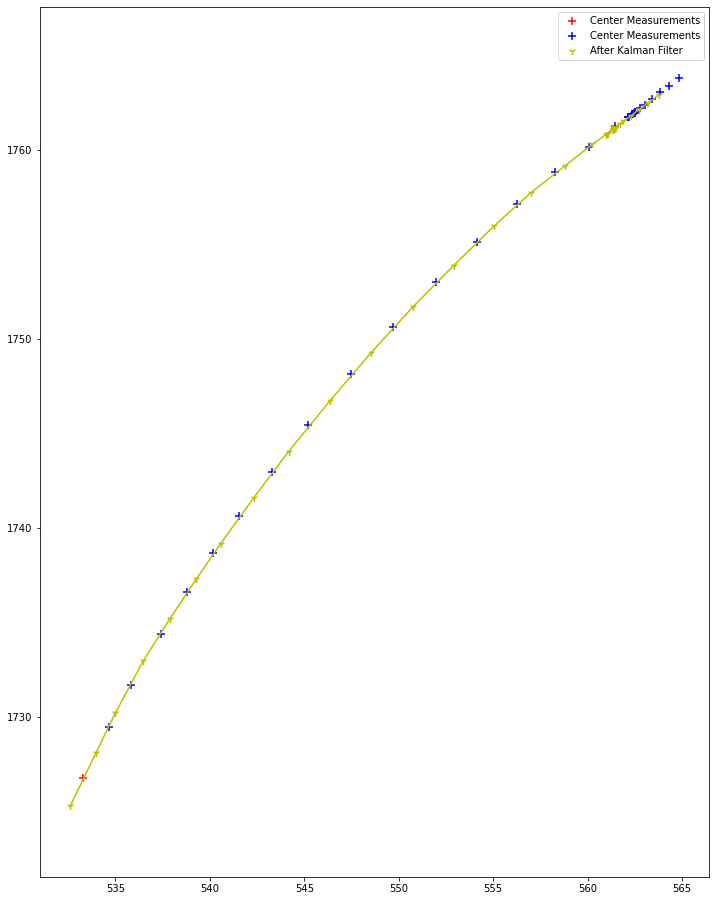

Index  89
0.13497975860270023
0.3125658129024935


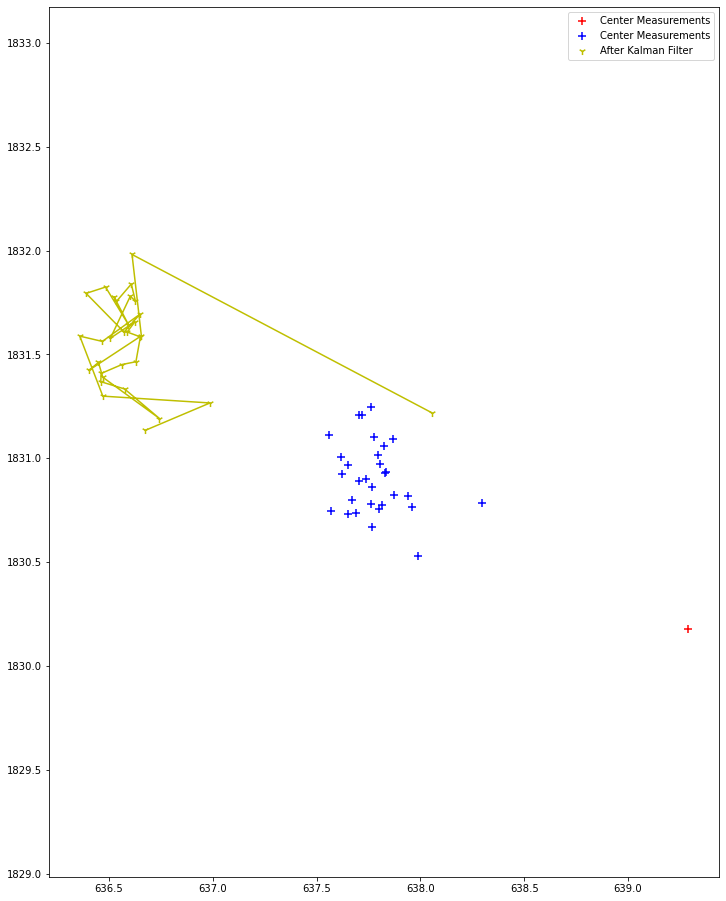

Index  90
0.13497975860270023
0.3125658129024935


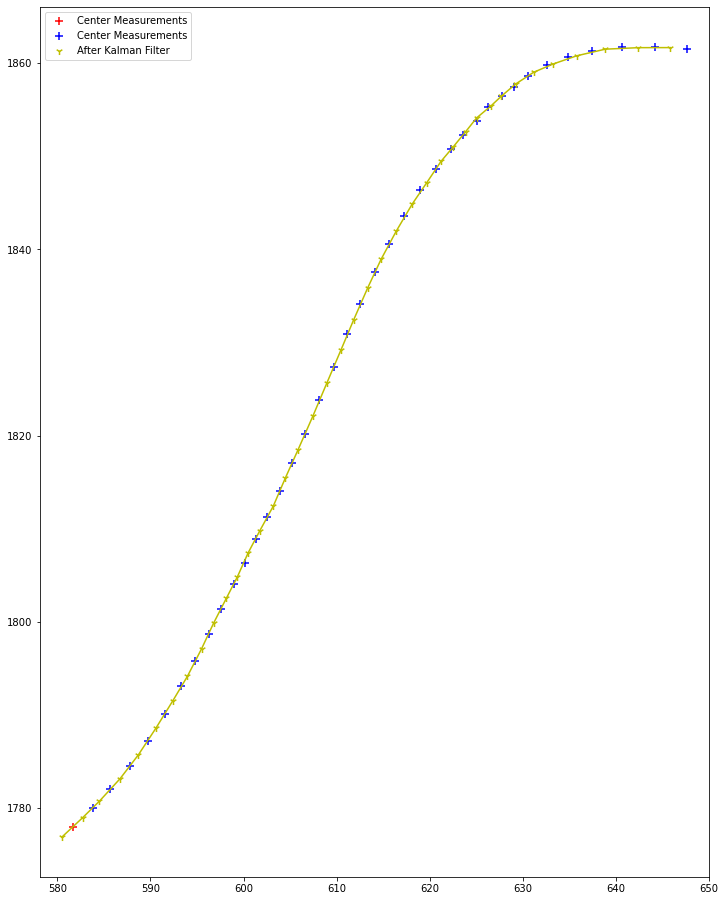

Index  91
0.13497975860270023
0.3125658129024935


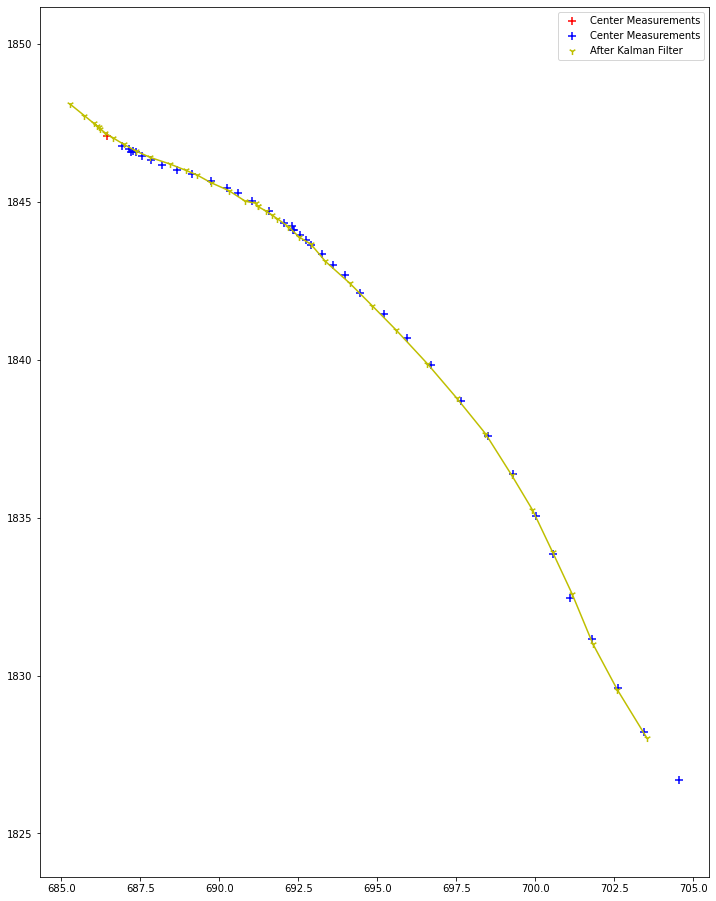

Index  92
0.13497975860270023
0.3125658129024935


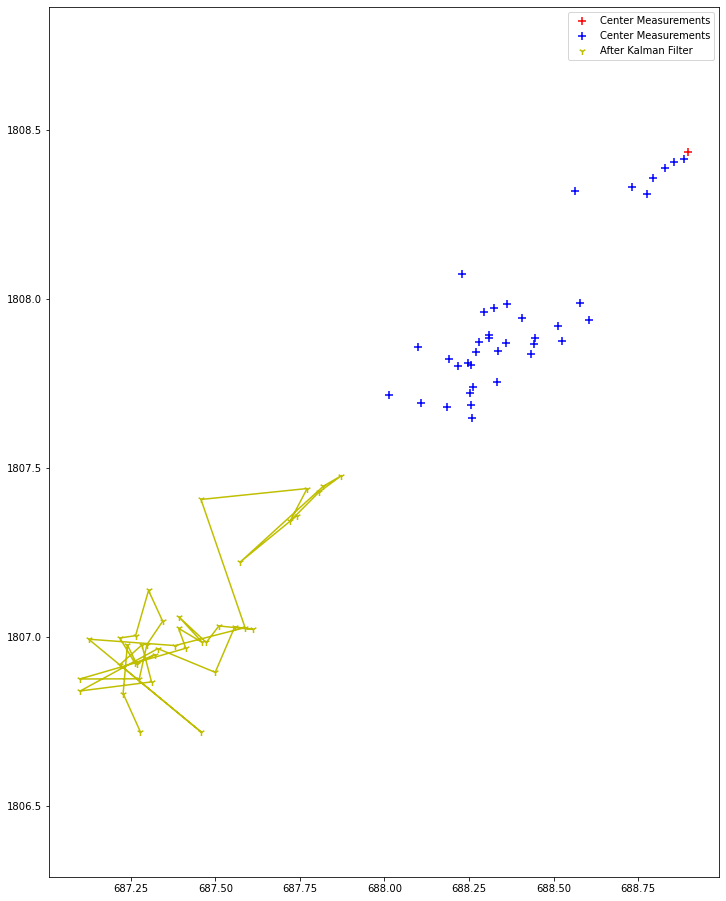

Index  93
0.13497975860270023
0.3125658129024935


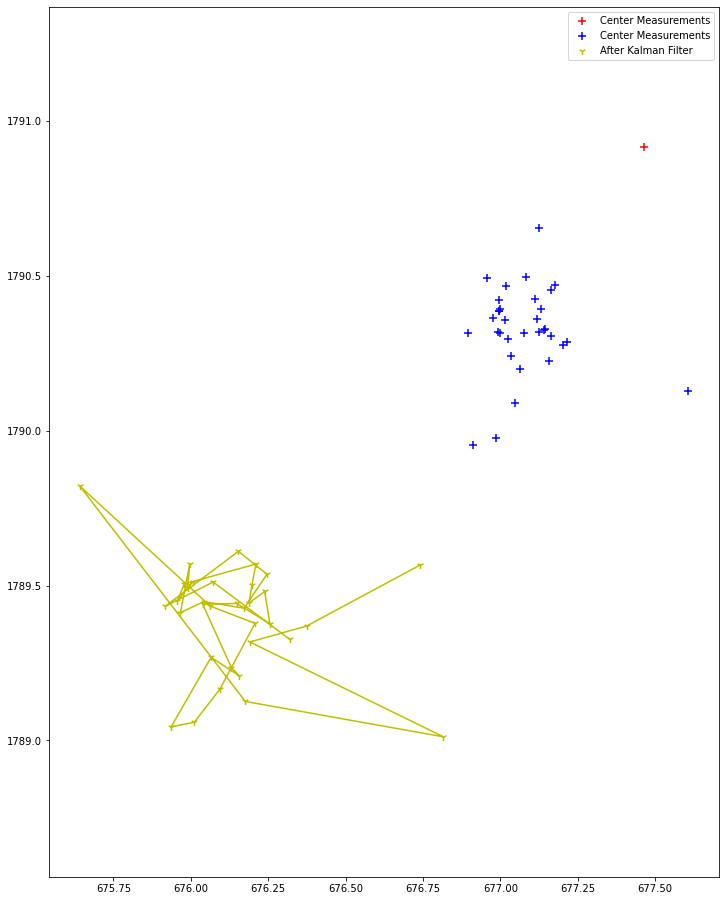

Index  94
0.13497975860270023
0.3125658129024935


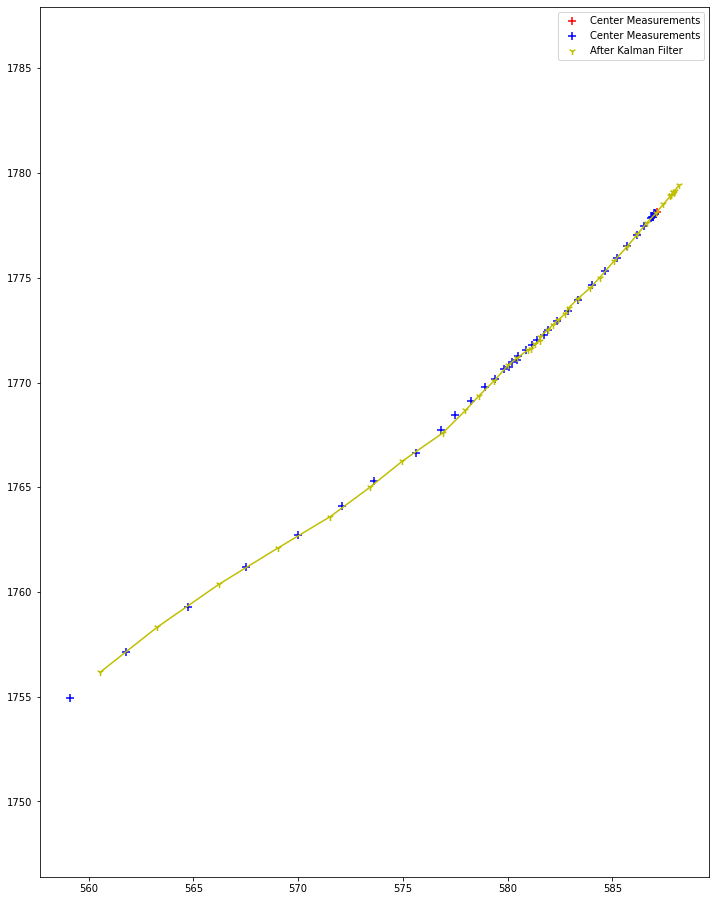

Index  95
0.13497975860270023
0.3125658129024935


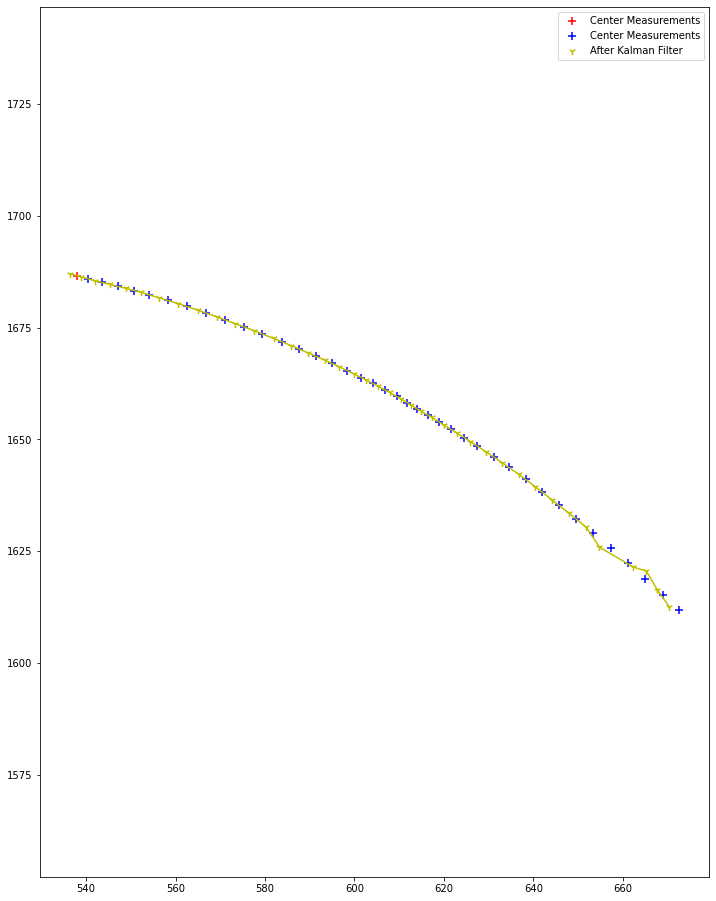

Index  96
0.13497975860270023
0.3125658129024935


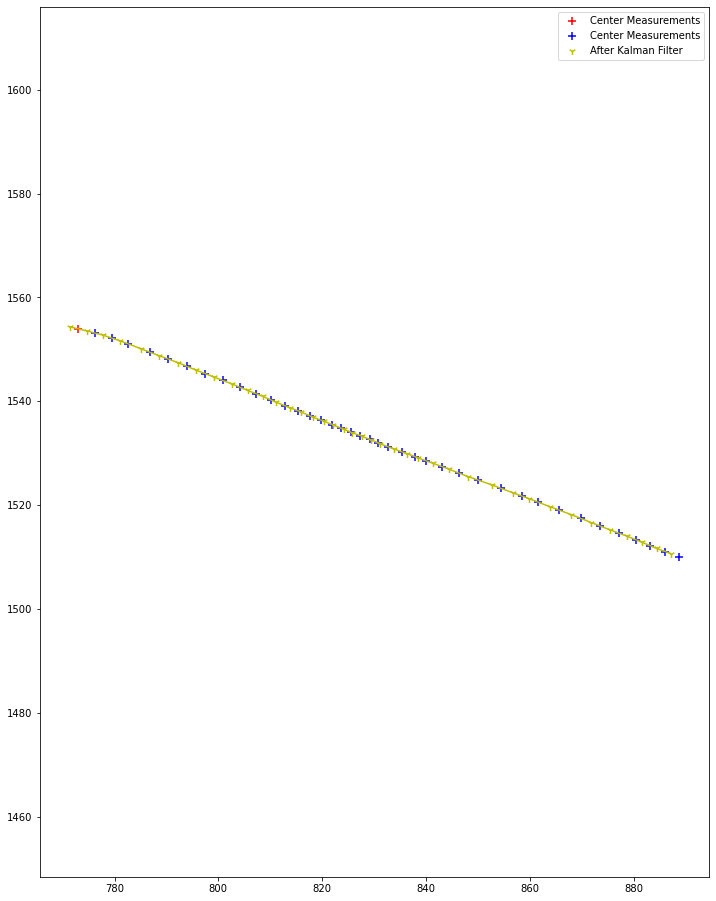

Index  97
0.13497975860270023
0.3125658129024935


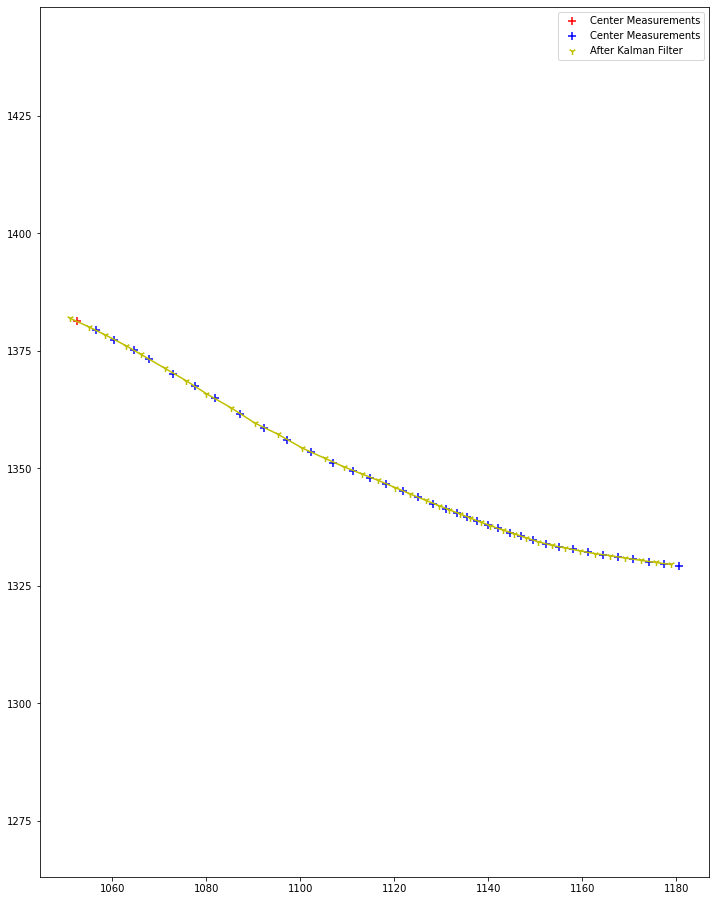

Index  98
0.13497975860270023
0.3125658129024935


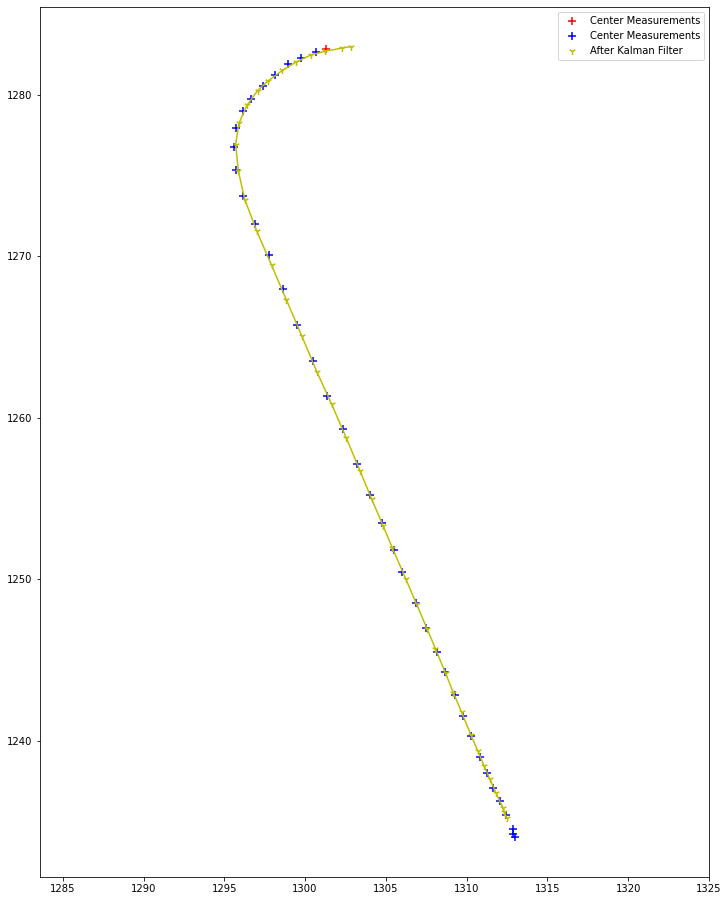

In [ ]:
from EKF import *
from EKF.EKF_wrapper import *
np.set_printoptions(precision=2)
for i in range(600):
    print("Index ", i)
    EKF_wrapper_obj = EKF_wraper()
    EKF_wrapper_obj.load_data_set(training_data[i])
    EKF_wrapper_obj.run_ekf()
    EKF_wrapper_obj.plot_result()

In [17]:
for index in range(len(training_data)):
    EKF_wrapper_obj = EKF_wraper()
    EKF_wrapper_obj.load_data_set(training_data[index])
    EKF_wrapper_obj.run_ekf()
    #EKF_wrapper_obj.plot_result()

TypeError: super(type, obj): obj must be an instance or subtype of type